## Study of the Swiss electrical mix (and imports) between 2016 and 2021

### 1. Configuring EcoDynElec and loading the data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from etude_stat.analysis_functions import compute_per_country, plot_metrics, analyze_series

from ecodynelec.parameter import Parameter  # Import the class to manipulate parameters

In [22]:
my_config = Parameter()  # Initialize a configuration object
# Set base config
my_config.freq = "H"
my_config.ctry = ['AT', 'CH', 'DE', 'FR', 'IT', 'CZ']
my_config.target = 'CH'
my_config.data_cleaning = True
my_config.path.generation = "./test_data/downloads/generations/"
my_config.path.exchanges = "./test_data/downloads/exchanges/"

#### 1.1 Download and generate data files
This can done once, then the electrical mix and impact files will be saved and can be loaded directly (see 1.2)

In [3]:
# Setup auto-downloading
my_config.server.useServer = False
my_config.server.username = 'aymericb5@gmail.com'
my_config.server.password = '8.U#Mf48nZn!eqc'

In [23]:
from etude_stat.analysis_functions import generate_data

years = ['2021'] #['2016', '2017', '2018', '2019', '2020', '2021']
my_config.residual_local = False
raws, mixs, impacts = generate_data(my_config, years)

Compute  2021
Load auxiliary datasets...
Load generation data...
	Generation data.
Data loading: 2.25 sec..
Memory usage table: 16.19 MB
Autocomplete...               6/6)...
	Completed.                              
Extraction raw generation: 0.69 sec.             
	Extraction time: 2.97 sec.
	4/4 - Resample exchanges to H steps...
Get and reduce importation data...
	Cross-border flow data.
Data loading: 0.93 sec..
Memory usage table: 6.1 MB
Autocomplete...               ...
	Completed.                              
Extraction raw import: 0.30 sec.             
	Extraction time: 1.24 sec.
Resample exchanges to H steps...
Gather generation and importation...
Import of data: 4.3 sec
Importing information...
Tracking origin of electricity...
	compute for day 31/31   
	Electricity tracking: 3.8 sec.

Before Index(['Biomass_AT', 'Fossil_Brown_coal/Lignite_AT',
       'Fossil_Coal-derived_gas_AT', 'Fossil_Gas_AT', 'Fossil_Hard_coal_AT',
       'Fossil_Oil_AT', 'Fossil_Oil_shale_AT', 'Fossil

#### 1.2 Load data from saved files
If the files for the years of interest have already been generated, they can be loaded directly in this section

In [5]:
from etude_stat.analysis_functions import load_data

years = ['2016', '2017', '2018', '2019', '2020', '2021']
impacts, mixs = load_data(my_config, years)

#### 1.3 Pre-processing the data
Here we reformat the data to make it easier to manipulate and plot

In [29]:
from etude_stat.analysis_functions import format_data

raw_production = format_data(raws, group_by_country=False)
electricity_mix = format_data(mixs)
electricity_impact = format_data(impacts)

In [36]:
electricity_mix['df']['CH']

2021-01-01 00:00:00    0.533954
2021-01-01 01:00:00    0.513280
2021-01-01 02:00:00    0.537738
2021-01-01 03:00:00    0.528234
2021-01-01 04:00:00    0.535486
                         ...   
2021-01-31 19:00:00    0.453496
2021-01-31 20:00:00    0.415995
2021-01-31 21:00:00    0.426867
2021-01-31 22:00:00    0.450168
2021-01-31 23:00:00    0.477457
Name: CH, Length: 744, dtype: float64

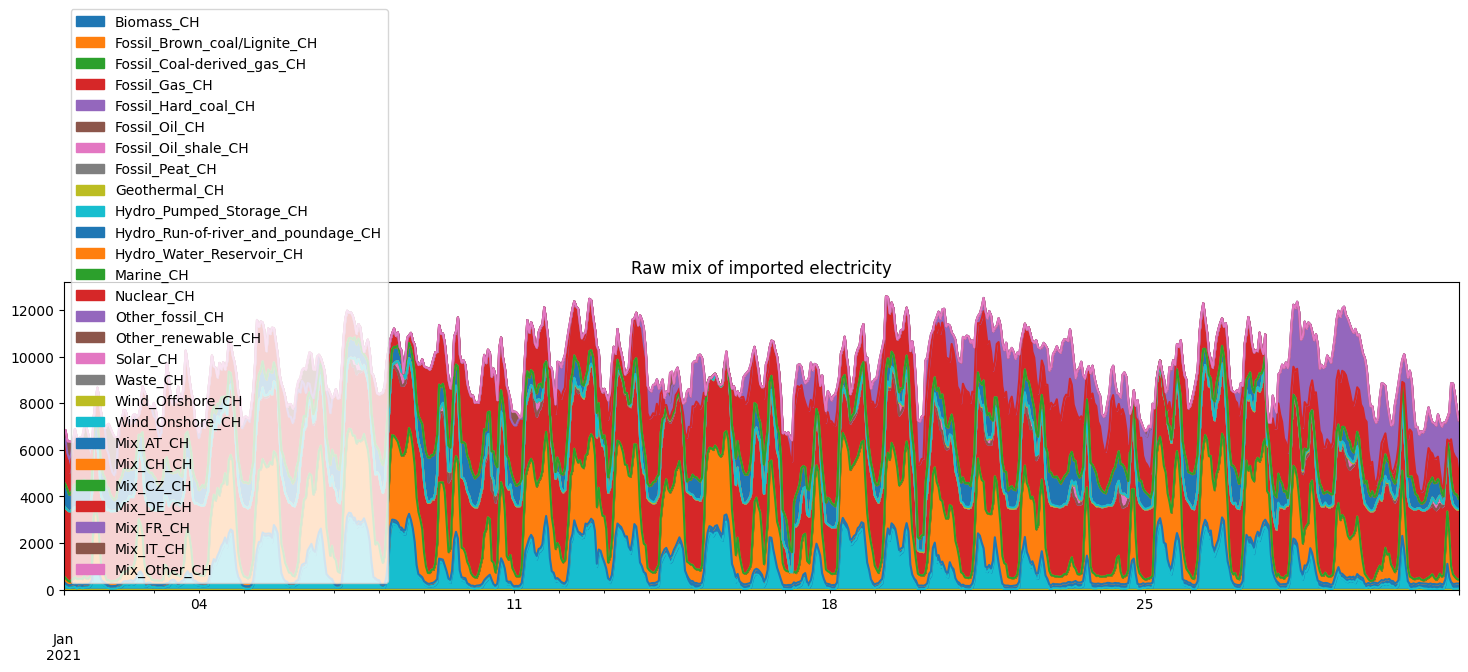

KeyboardInterrupt: 

In [32]:
raw_production['raw_df'].drop(['sum'], axis=1).plot.area(figsize=(18, 4), title="Raw mix of imported electricity")
plt.show()

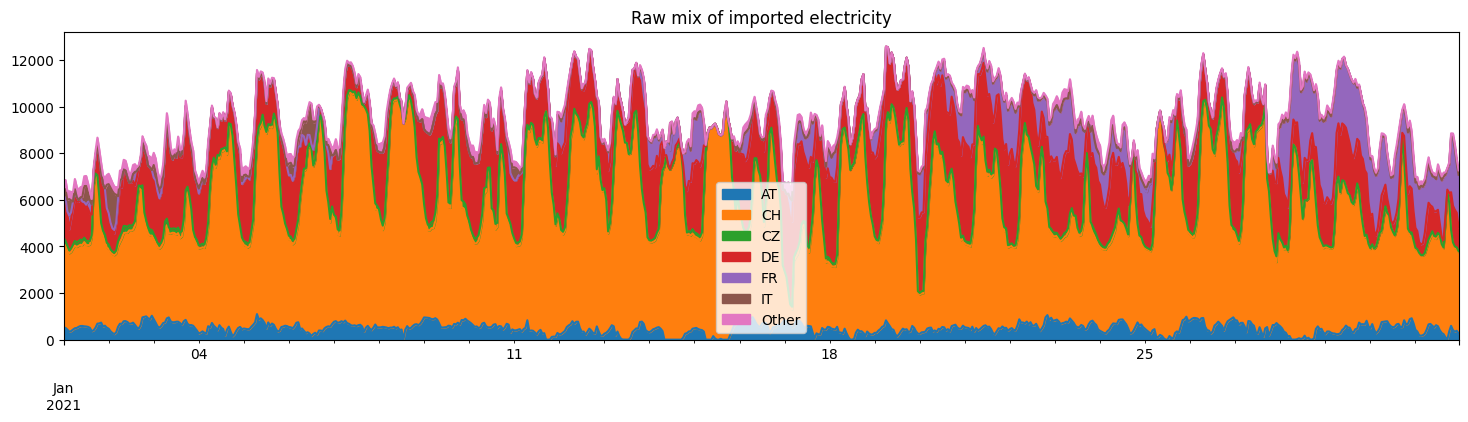

In [39]:
(electricity_mix['df'].drop(['sum'], axis=1).multiply(raw_production['raw_df']['sum'], axis='index')).plot.area(figsize=(18, 4), title="Raw mix of imported electricity")
plt.show()

### 2. Analysis of the electrical mixs

In [50]:
daily_productions.columns

Index(['AT', 'CH', 'CZ', 'DE', 'FR', 'IT', 'Other', 'sum'], dtype='object')

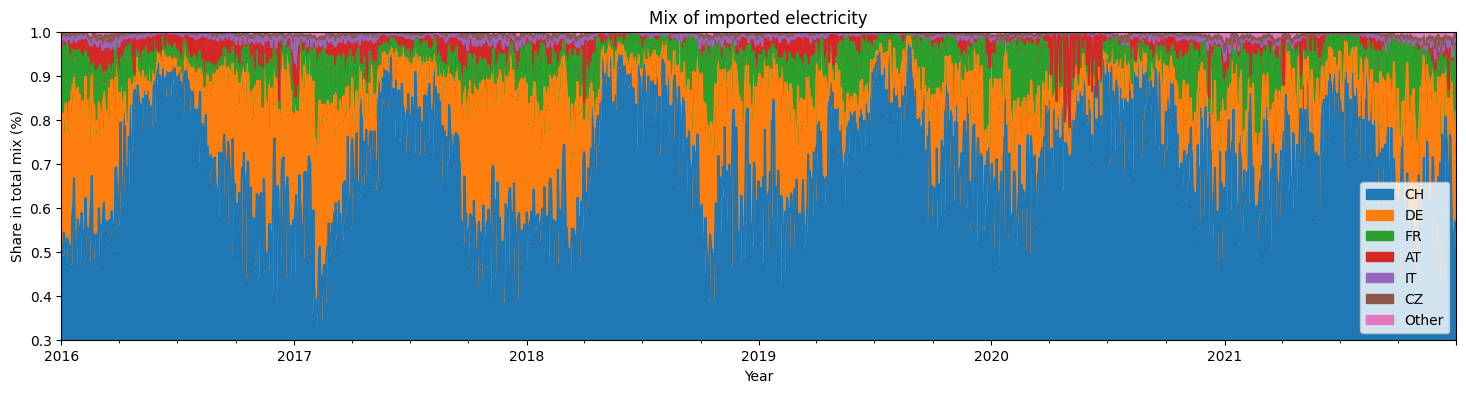

In [53]:
daily_productions.drop('sum', axis=1)[['CH', 'DE', 'FR', 'AT', 'IT', 'CZ', 'Other']].plot.area(figsize=(18, 4), title="Mix of imported electricity")
plt.xlabel('Year')
plt.ylabel('Share in total mix (%)')
plt.ylim(0.3, 1)
plt.show()

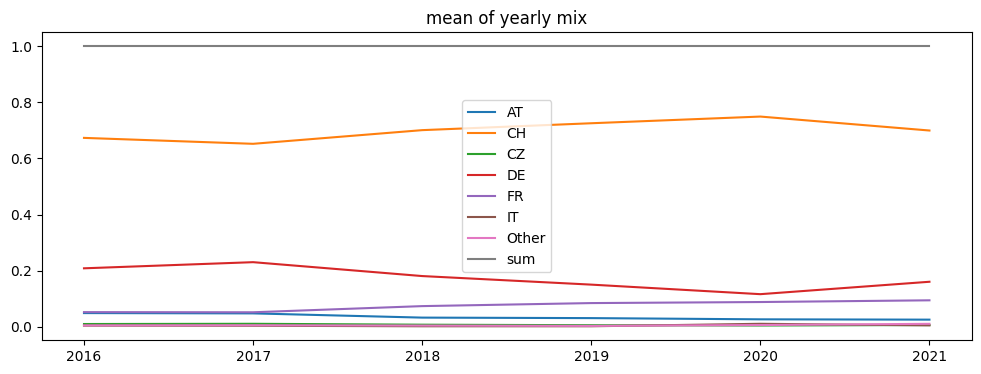

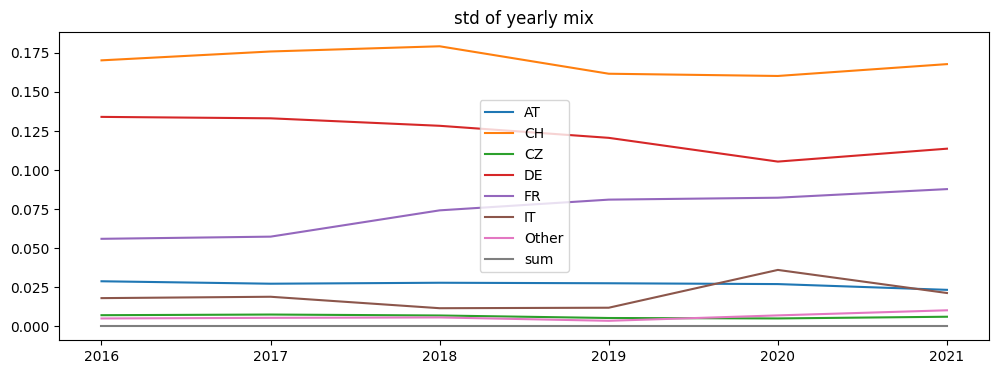

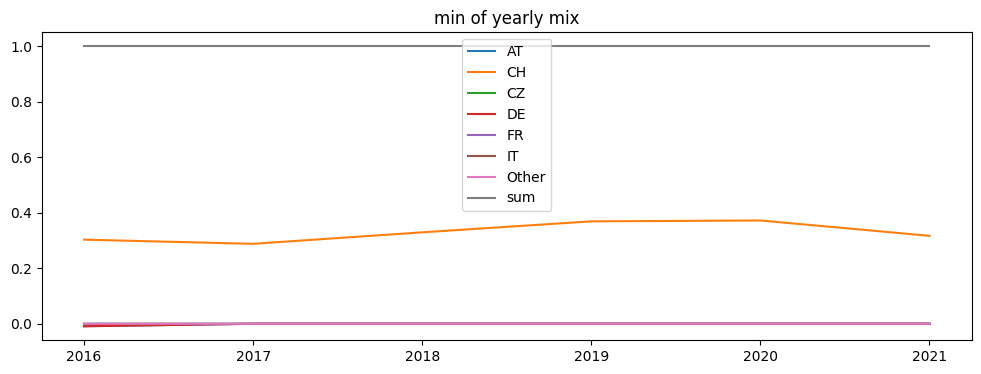

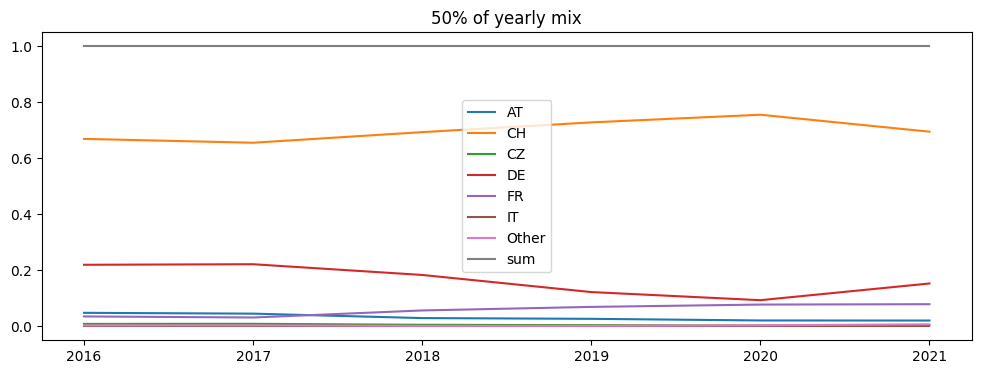

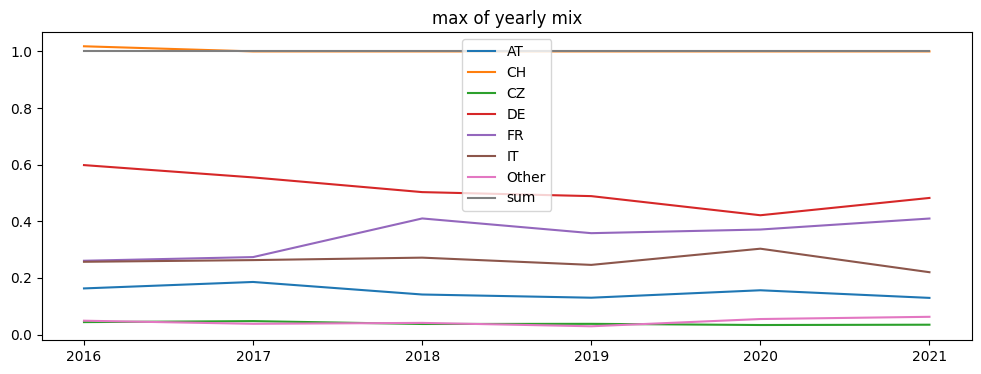

In [9]:
x=ax

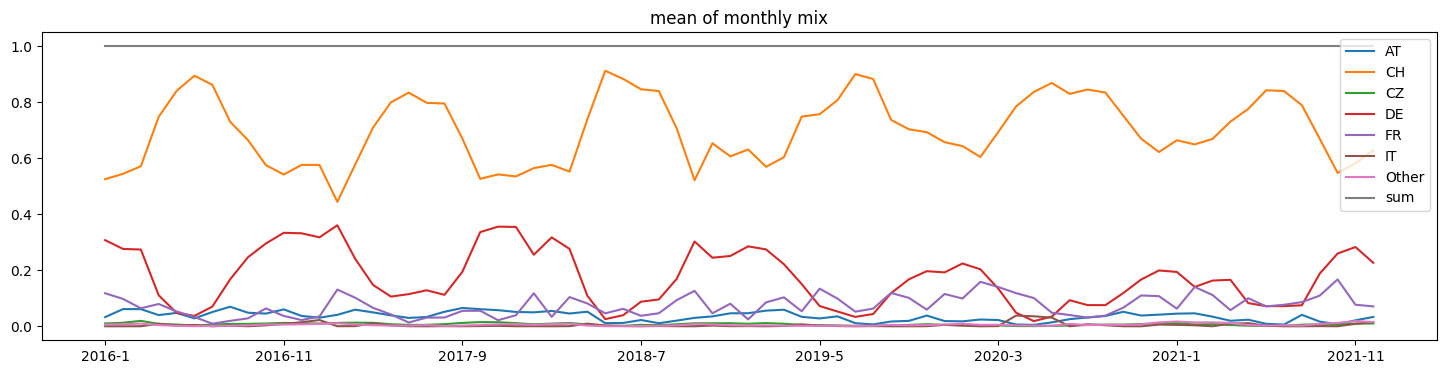

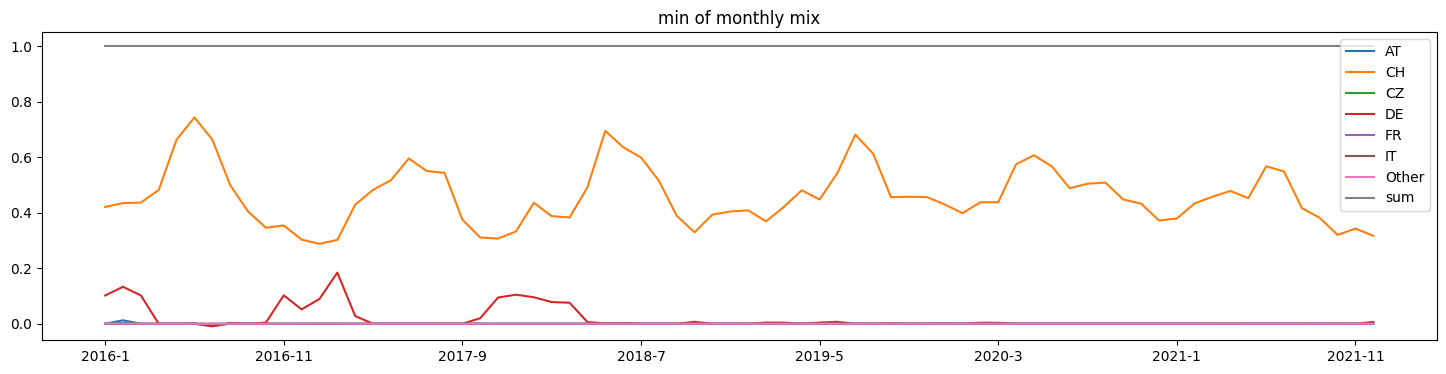

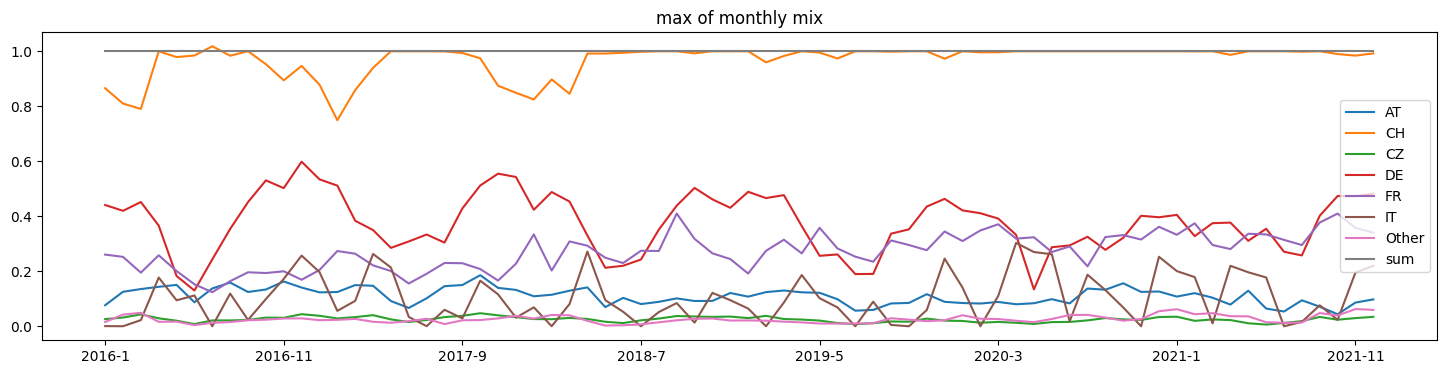

In [10]:
metrics = ['mean', 'min', 'max']  # Metrics to plot
plot_metrics(years, productions, 'monthly mix', metrics, 'M', figsize=(18, 4))

Analyze hydro pumped storage production

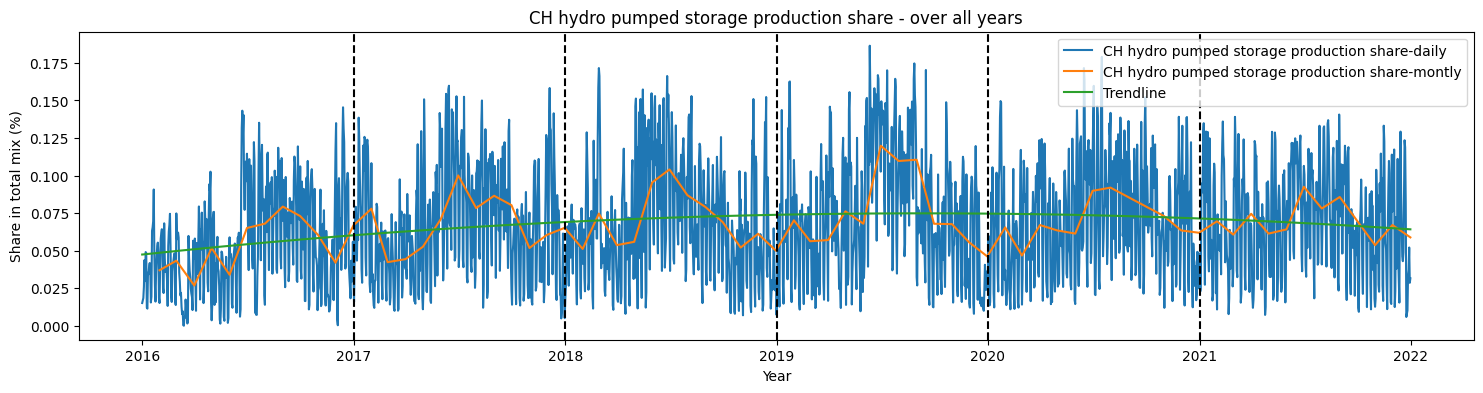

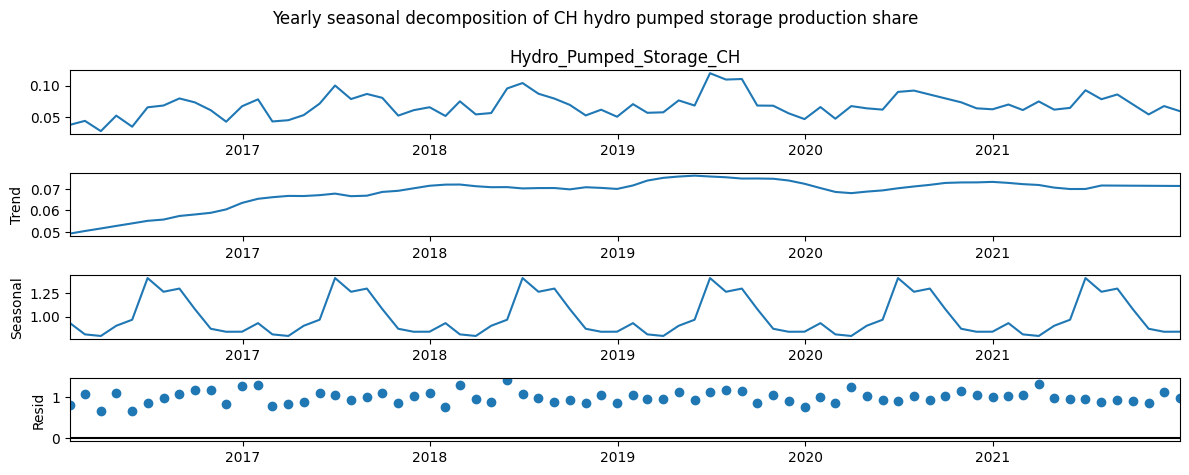

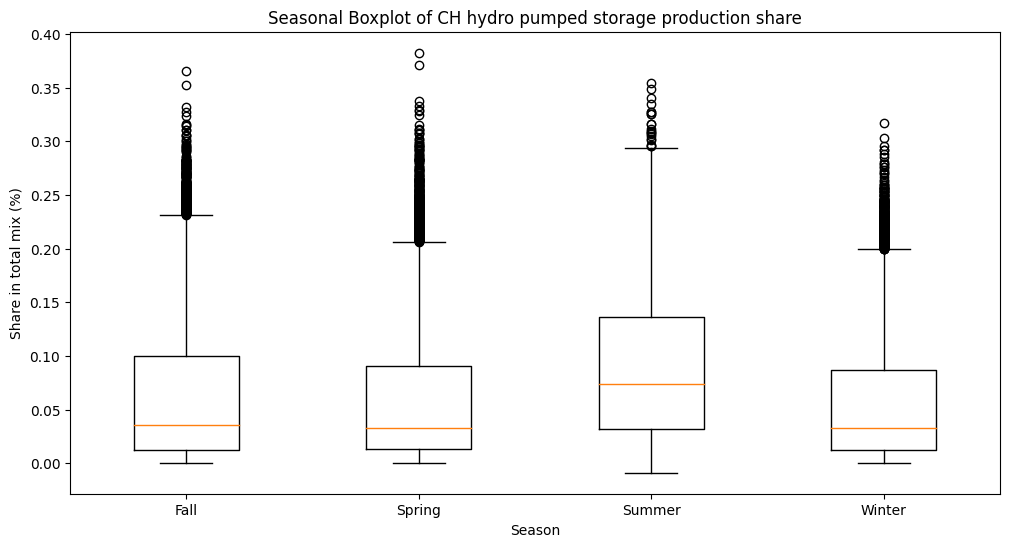

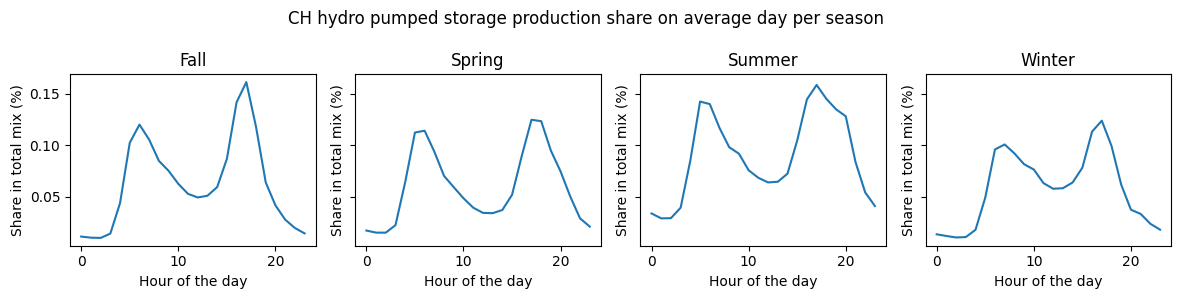

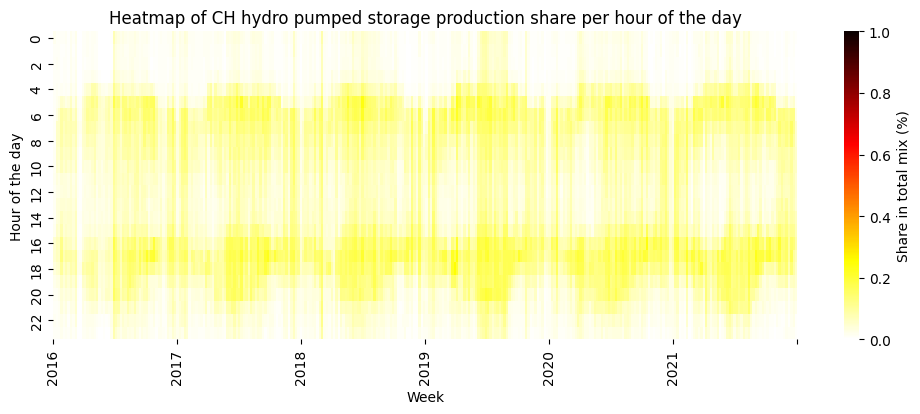

In [15]:
from etude_stat.analysis_functions import analyze_series

seasonal_data_ch_hp, grouped_data_ch_hp, season_names_ch_hp = analyze_series(production_hydro_ch, daily_prod_hydro_ch,
                                                           monthly_prod_hydro_ch,
                                                           'CH hydro pumped storage production share')

Let's analyze CH, DE and FR more in details

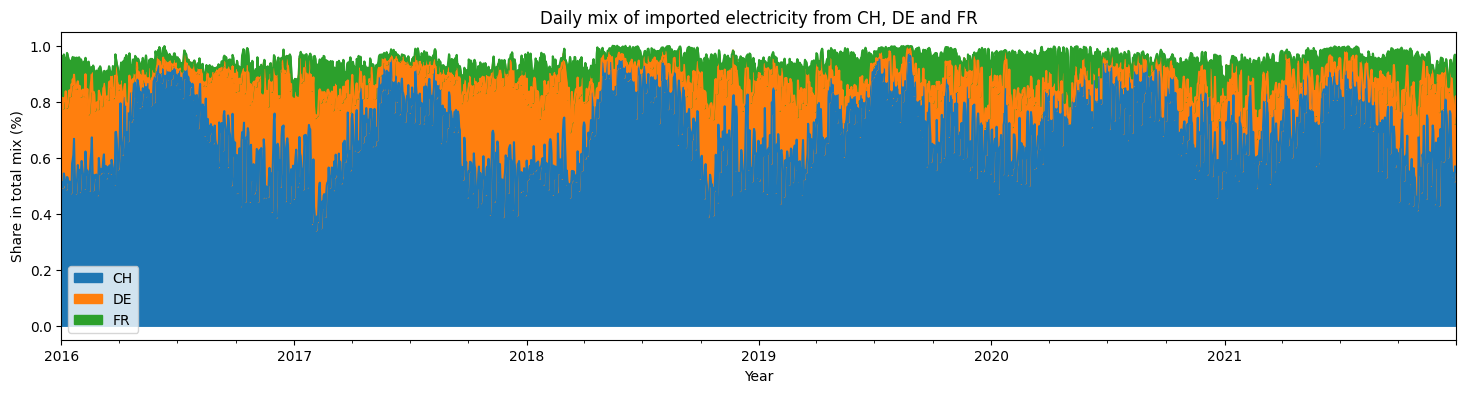

In [35]:
daily_productions[['CH', 'DE', 'FR']].plot.area(figsize=(18, 4), legend=True)
#daily_prod_hydro_ch.plot(figsize=(18, 4), label="CH hydro", legend=True)
plt.xlabel('Year')
plt.ylabel('Share in total mix (%)')
plt.title('Daily mix of imported electricity from CH, DE and FR')
plt.show()

CH :

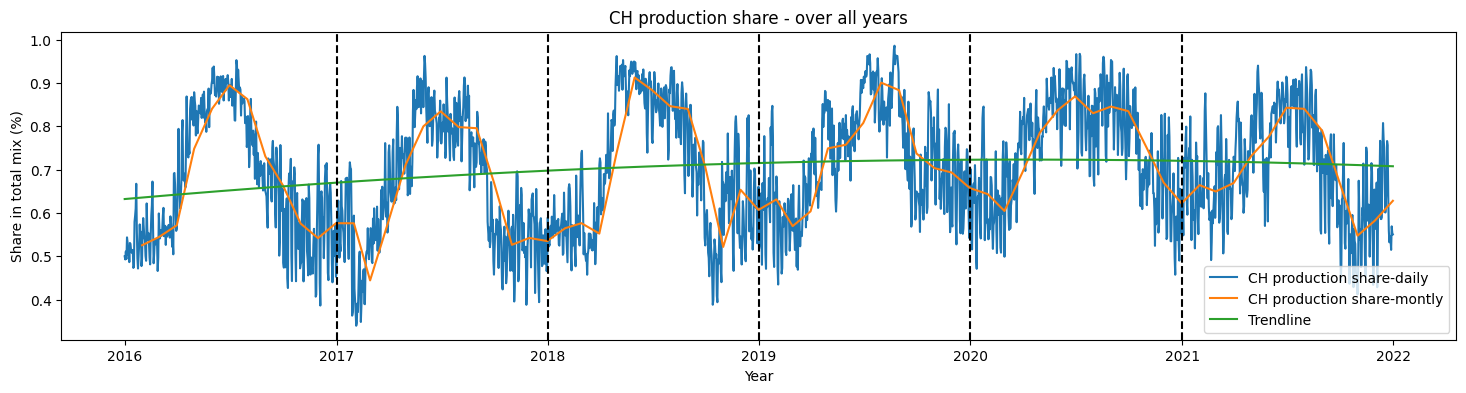

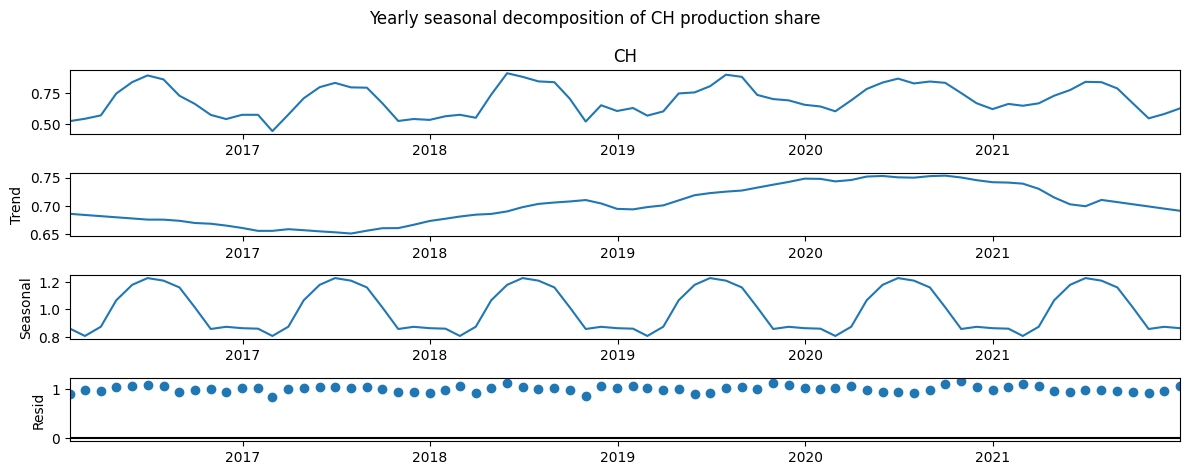

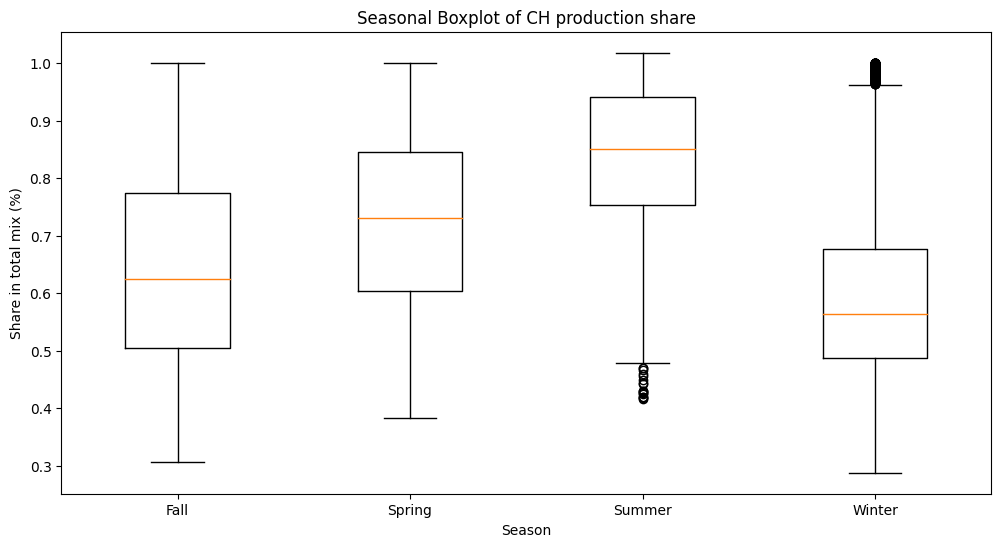

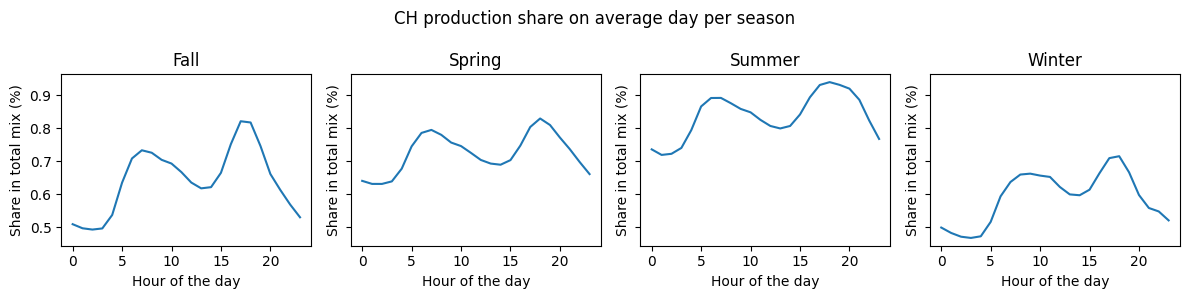

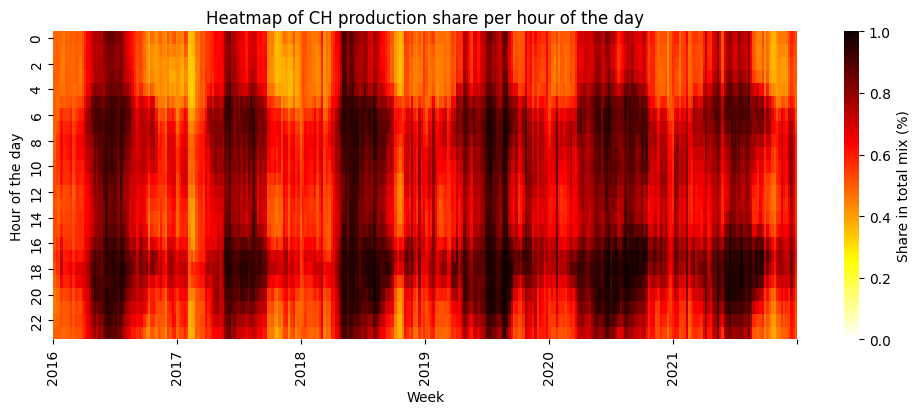

In [17]:
seasonal_data_ch, grouped_data_ch, season_names_ch = analyze_series(productions['CH'], daily_productions['CH'],
                                                           monthly_productions['CH'], 'CH production share')

DE :

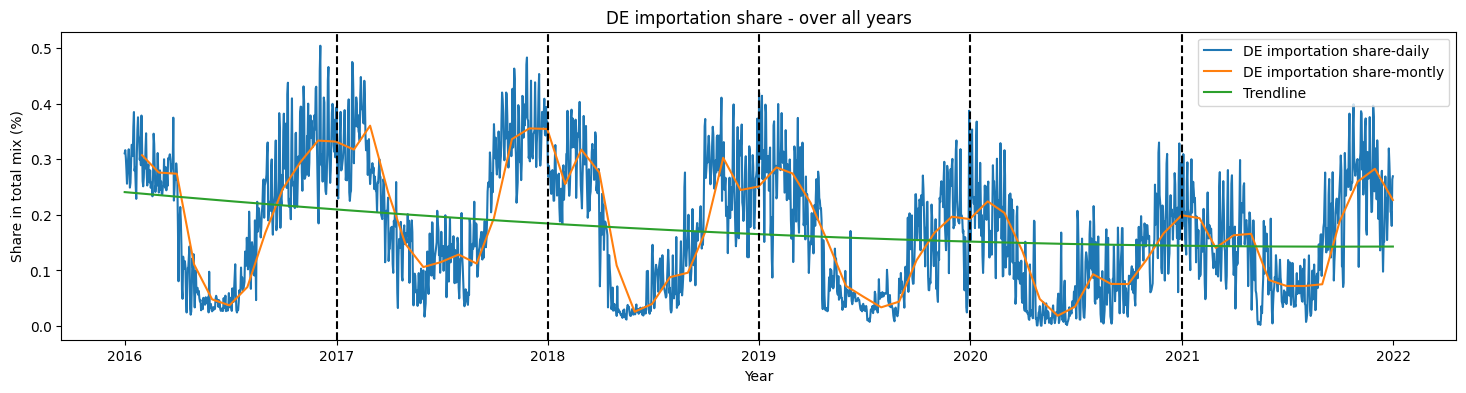

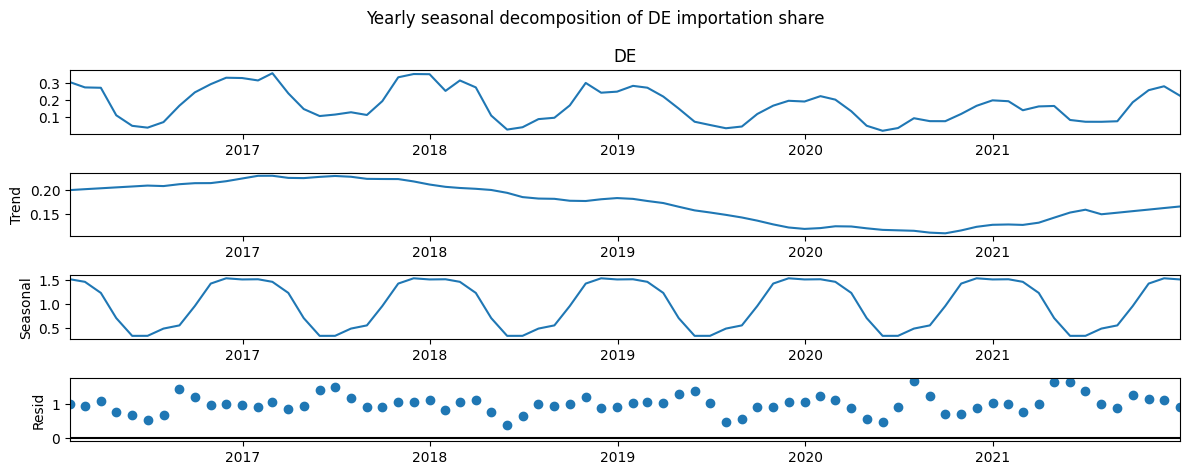

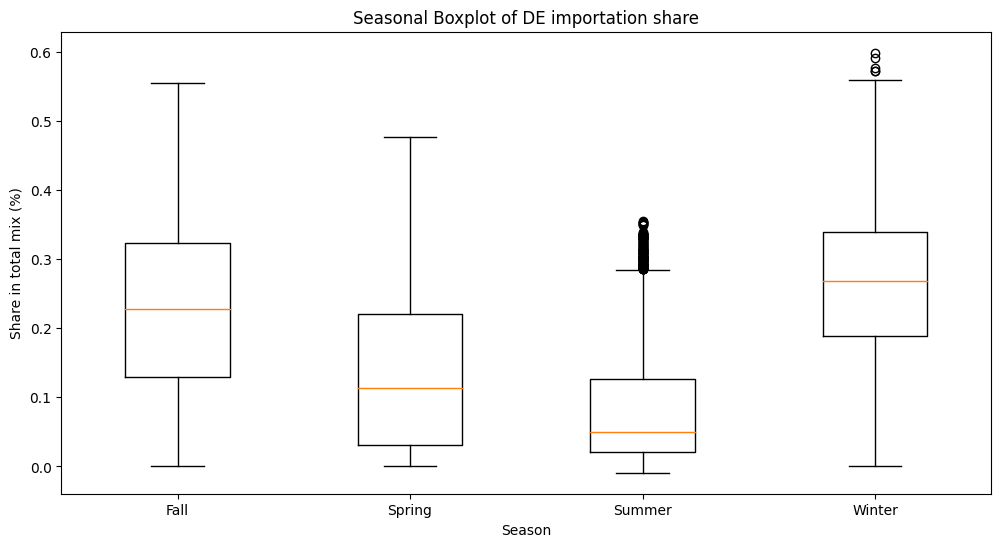

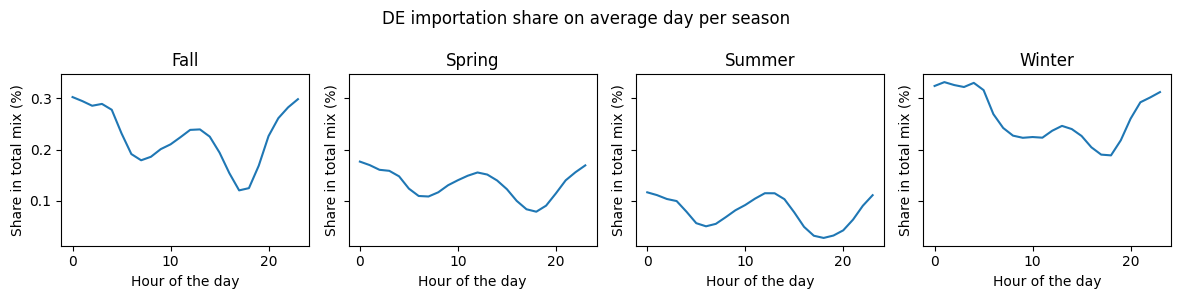

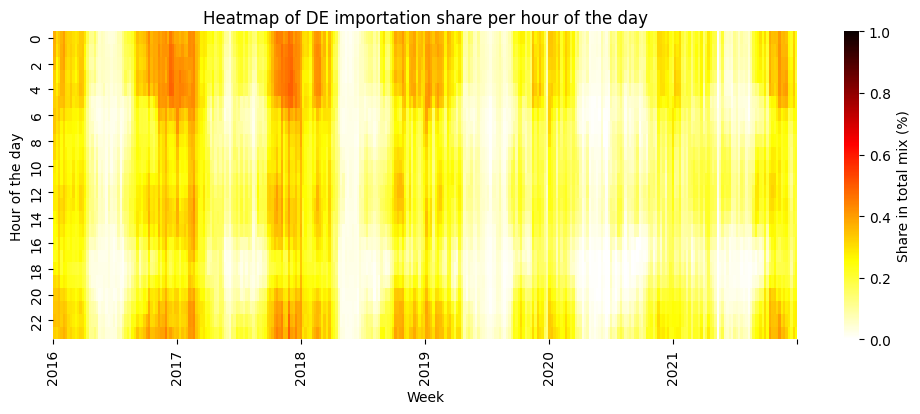

In [18]:
seasonal_data_de, grouped_data_de, season_names_de = analyze_series(productions['DE'], daily_productions['DE'],
                                                           monthly_productions['DE'], 'DE importation share')

FR :

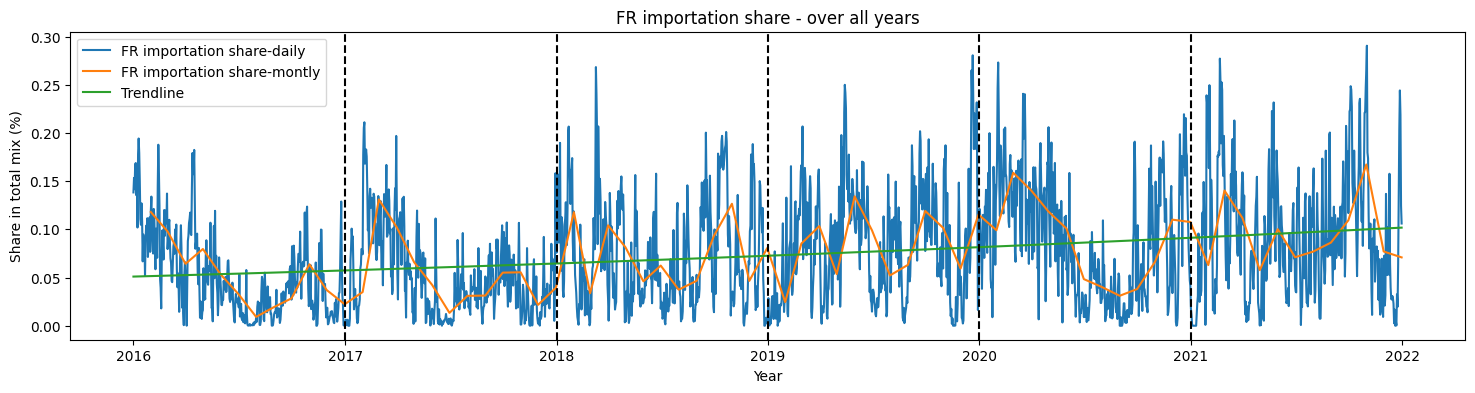

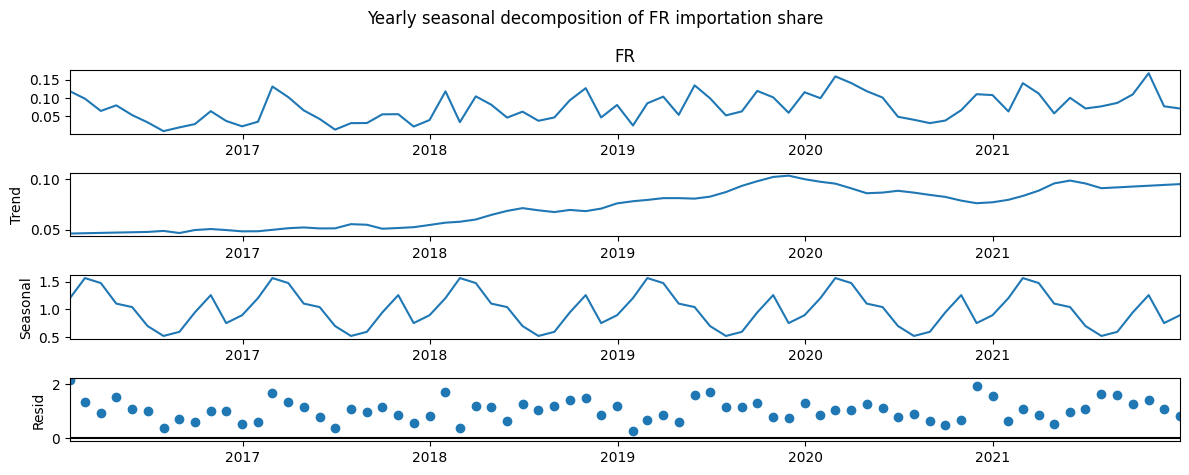

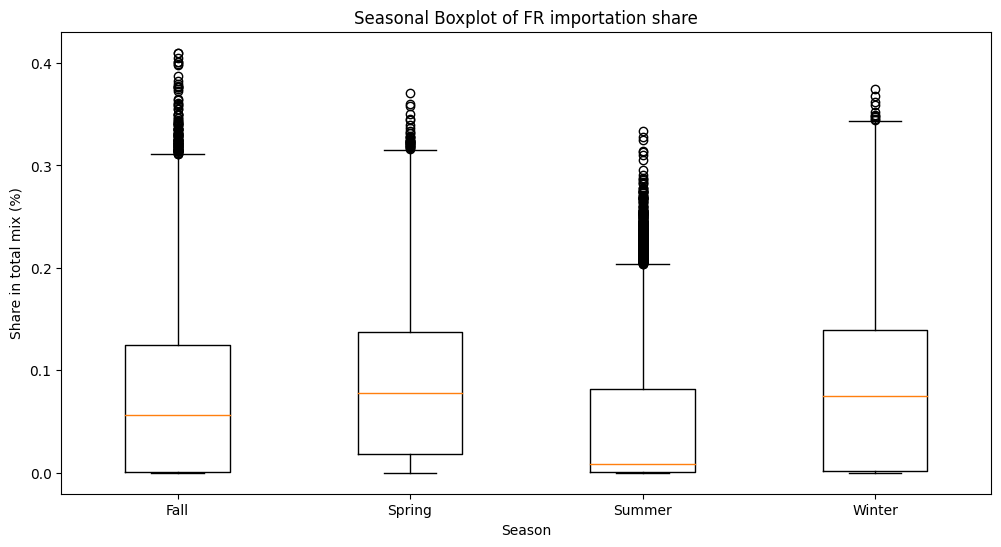

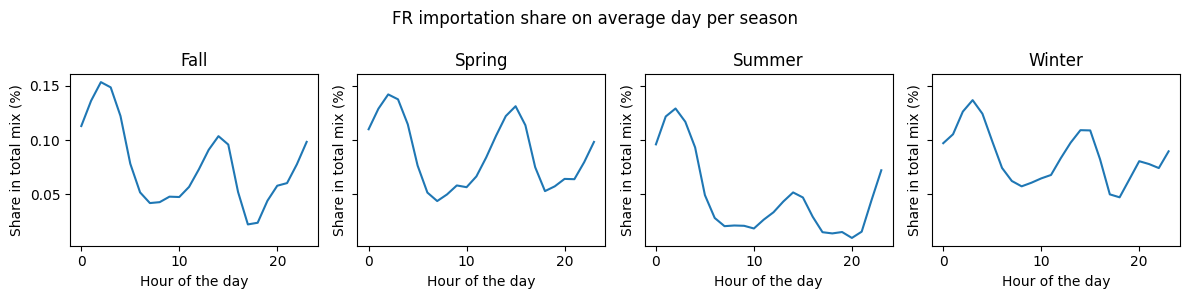

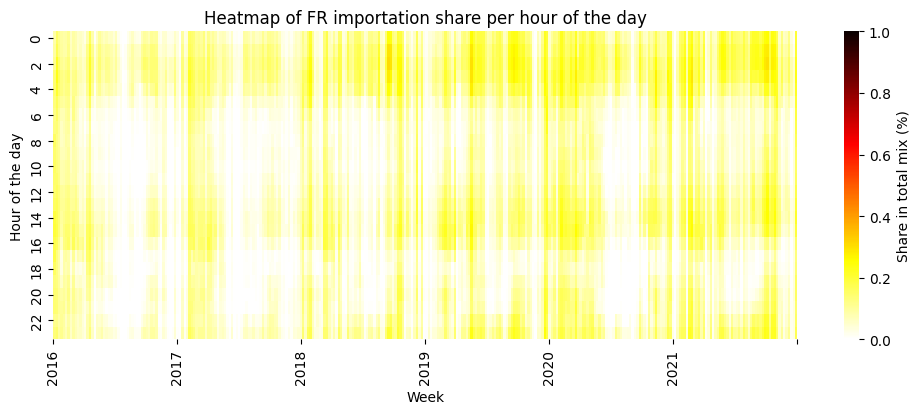

In [19]:
seasonal_data_fr, grouped_data_fr, season_names_fr = analyze_series(productions['FR'], daily_productions['FR'],
                                                           monthly_productions['FR'], 'FR importation share')

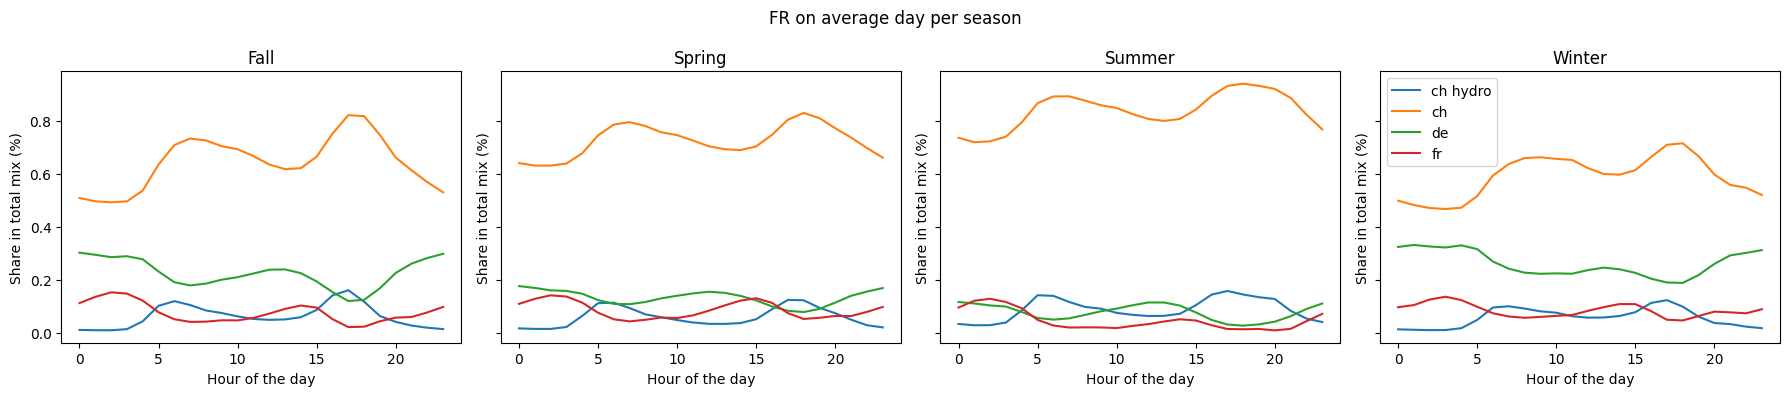

In [26]:
from etude_stat.analysis_functions import plot_typical_days

ylabel = 'Share in total mix (%)'
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(18, 4))
plot_typical_days(seasonal_data_ch_hp, grouped_data_ch_hp, 'CH hydro pumped storage production share', ylabel, fig=fig, ax=ax)
plot_typical_days(seasonal_data_ch, grouped_data_ch, 'CH', ylabel, fig=fig, ax=ax)
plot_typical_days(seasonal_data_de, grouped_data_de, 'DE', ylabel, fig=fig, ax=ax)
plot_typical_days(seasonal_data_fr, grouped_data_fr, 'FR', ylabel, fig=fig, ax=ax)
plt.legend(['ch hydro', 'ch', 'de', 'fr']);

### 3. Analysis of the GWP impact

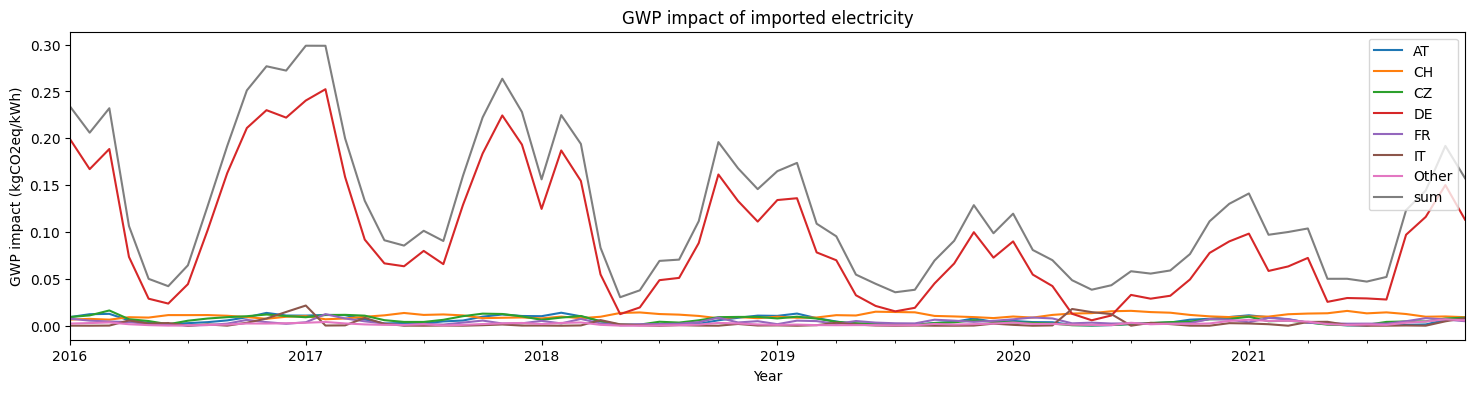

In [27]:
monthly_gwp.plot(figsize=(18, 4), title="GWP impact of imported electricity")
plt.xlabel('Year')
plt.ylabel('GWP impact (kgCO2eq/kWh)')
plt.show()

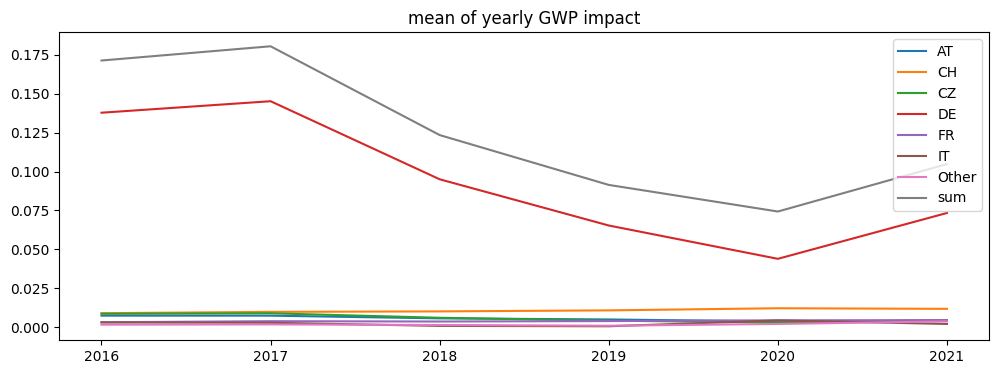

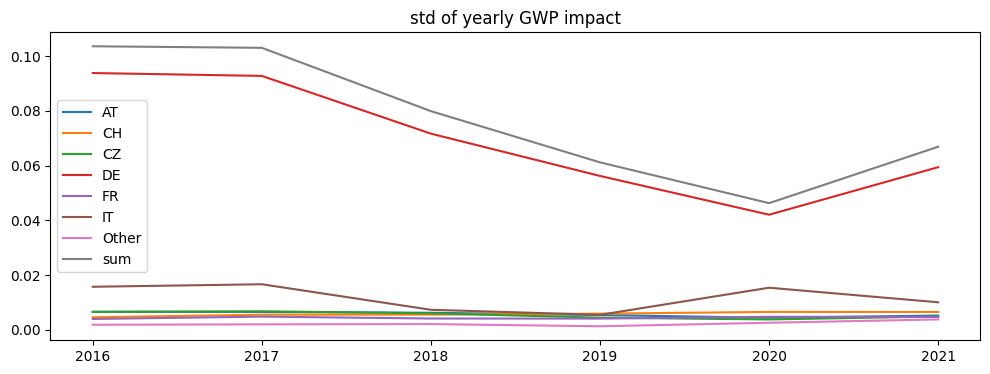

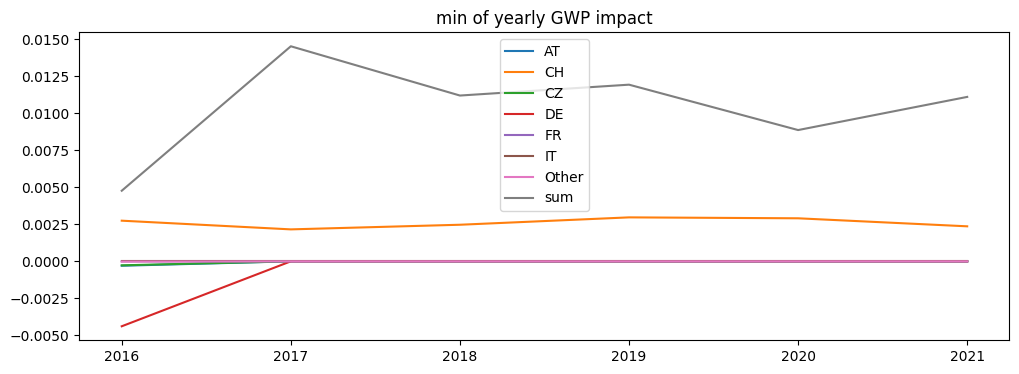

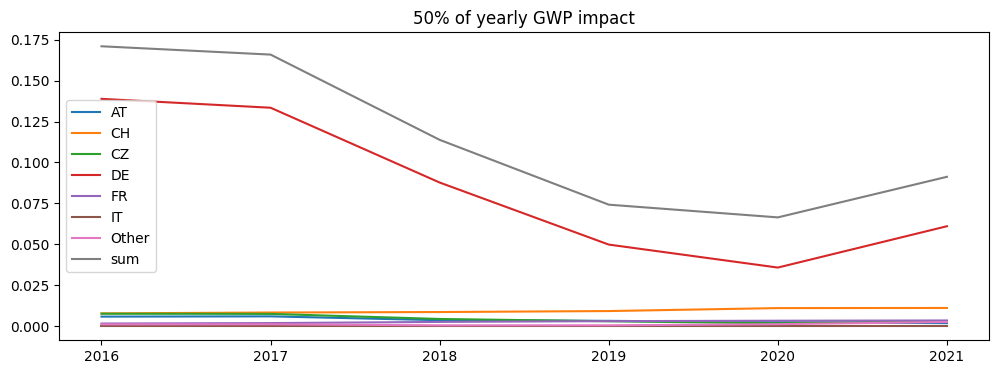

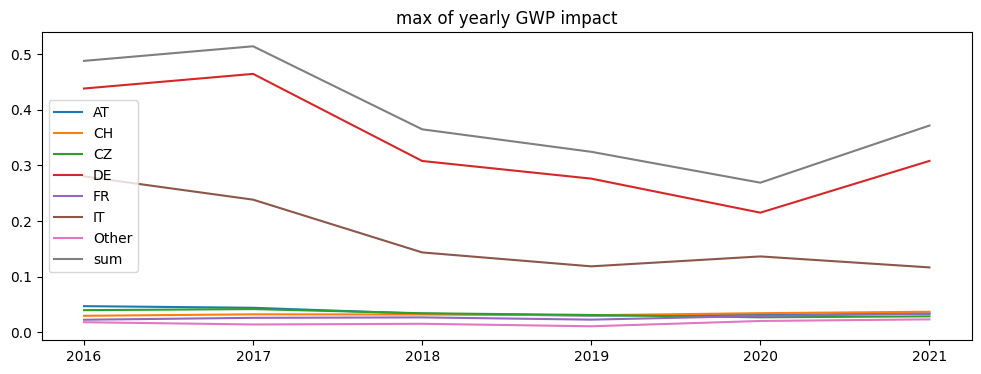

In [28]:
metrics = ['mean', 'std', 'min', '50%', 'max']  # Metrics to plot
plot_metrics(years, gwps, 'yearly GWP impact', metrics, 'Y', figsize=(12, 4))

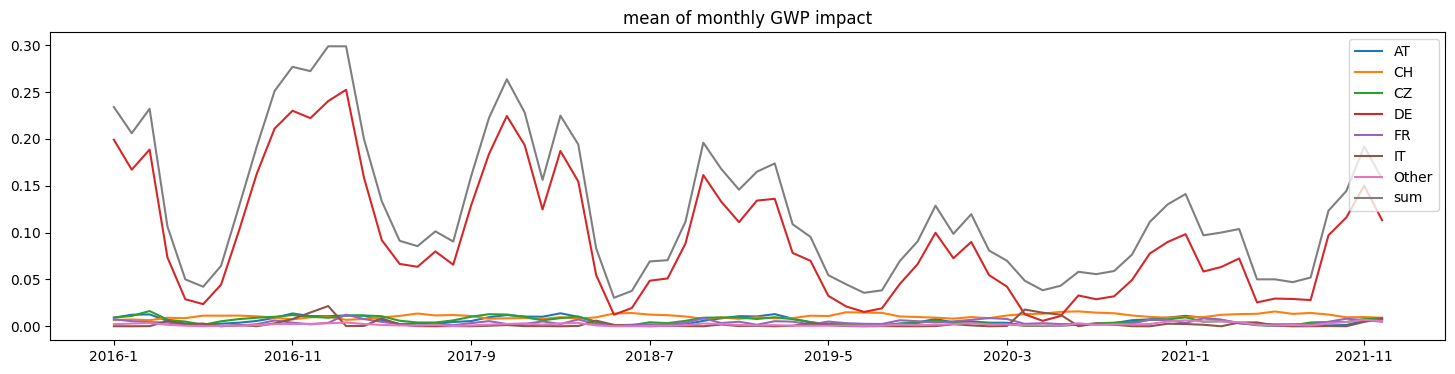

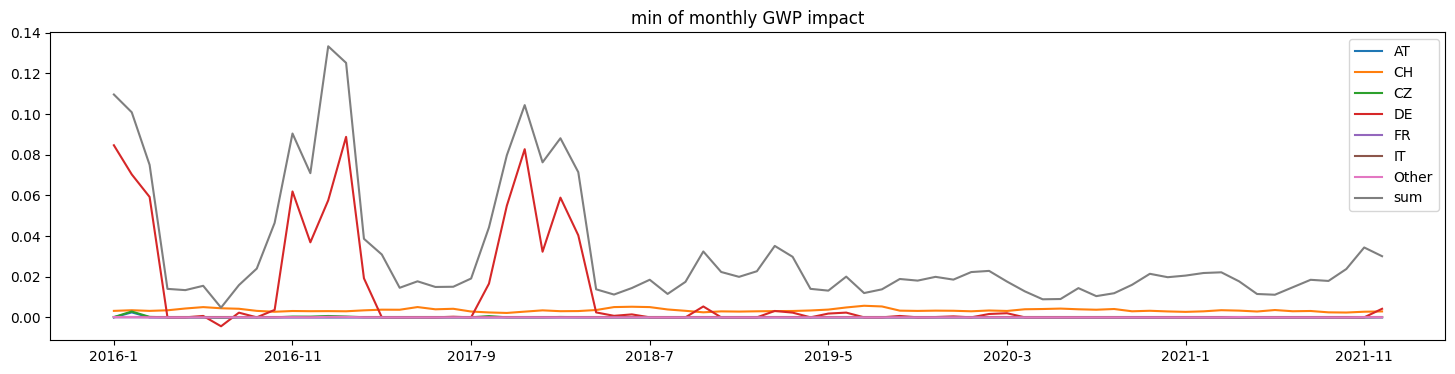

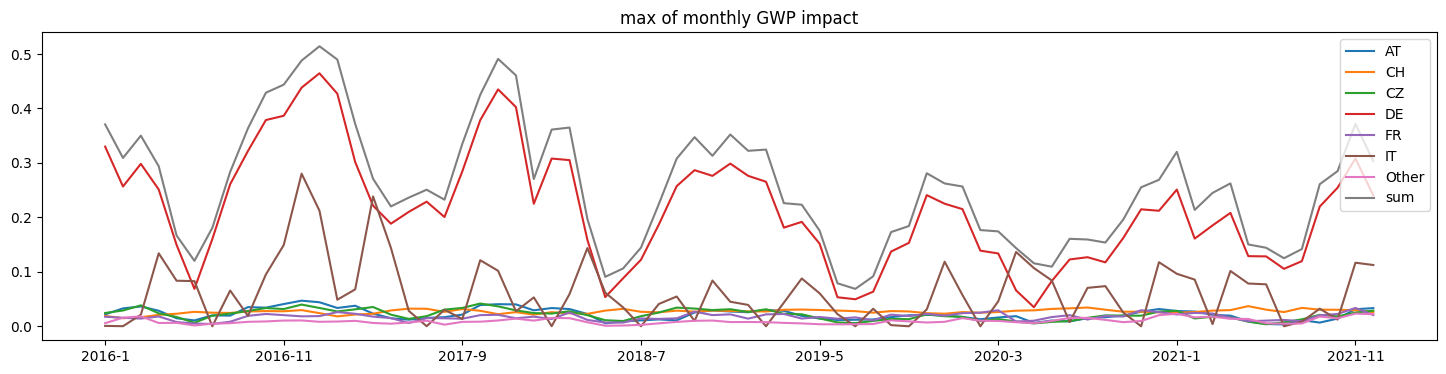

In [29]:
metrics = ['mean', 'min', 'max']  # Metrics to plot
plot_metrics(years, gwps, 'monthly GWP impact', metrics, 'M', figsize=(18, 4))

Let's analyze CH, DE and FR more in details

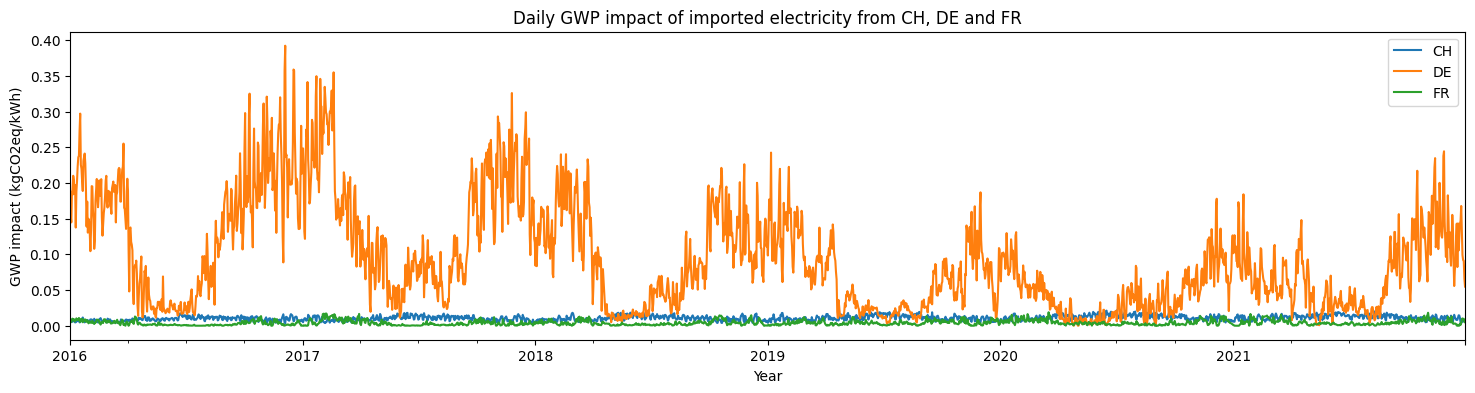

In [30]:
daily_gwp[['CH', 'DE', 'FR']].plot(figsize=(18, 4), legend=True)
# not interesting daily_gwp_hydro_ch.plot(figsize=(18, 4), label="CH hydro", legend=True)
plt.xlabel('Year')
plt.ylabel('GWP impact (kgCO2eq/kWh)')
plt.title('Daily GWP impact of imported electricity from CH, DE and FR')
plt.show()

CH :

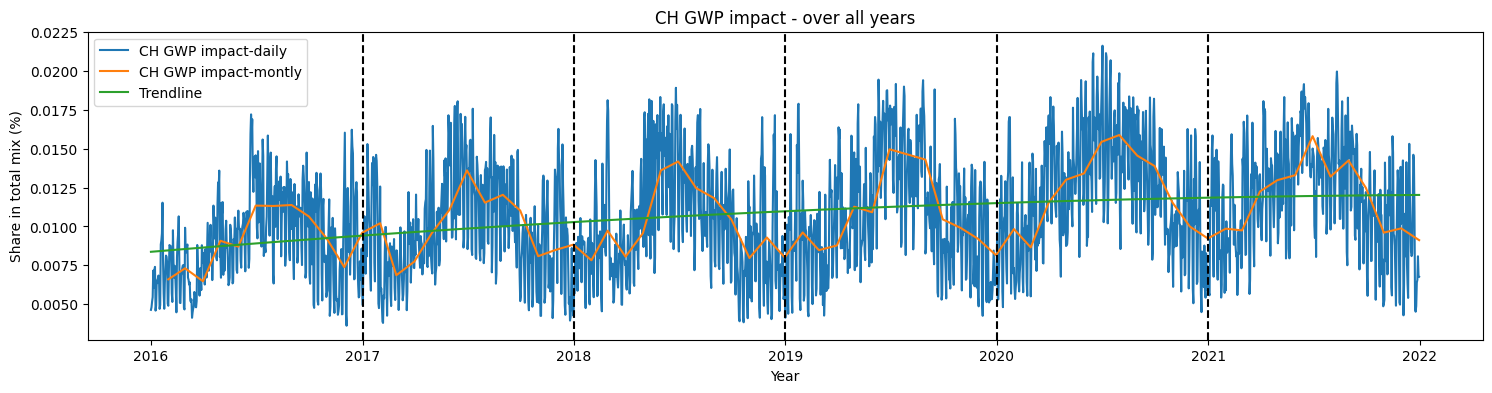

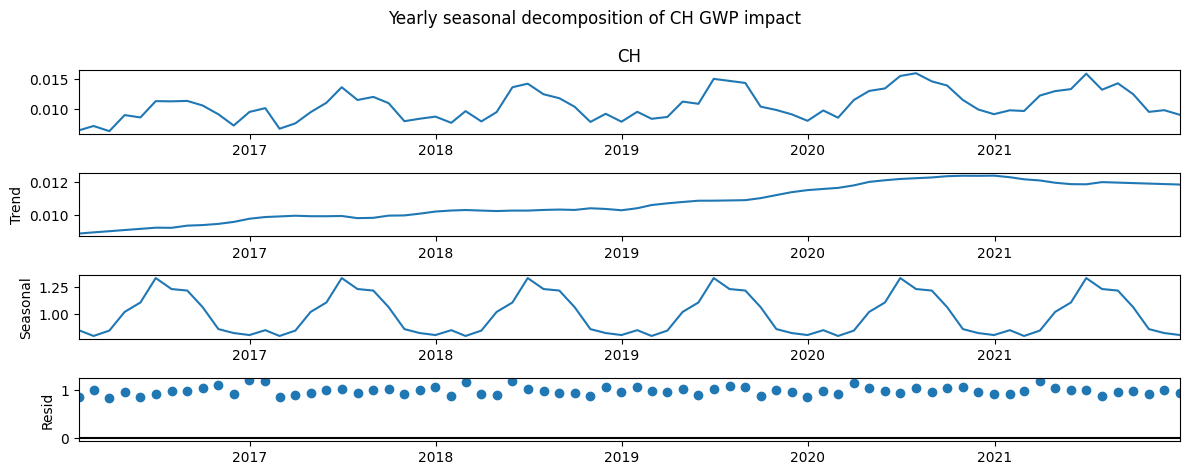

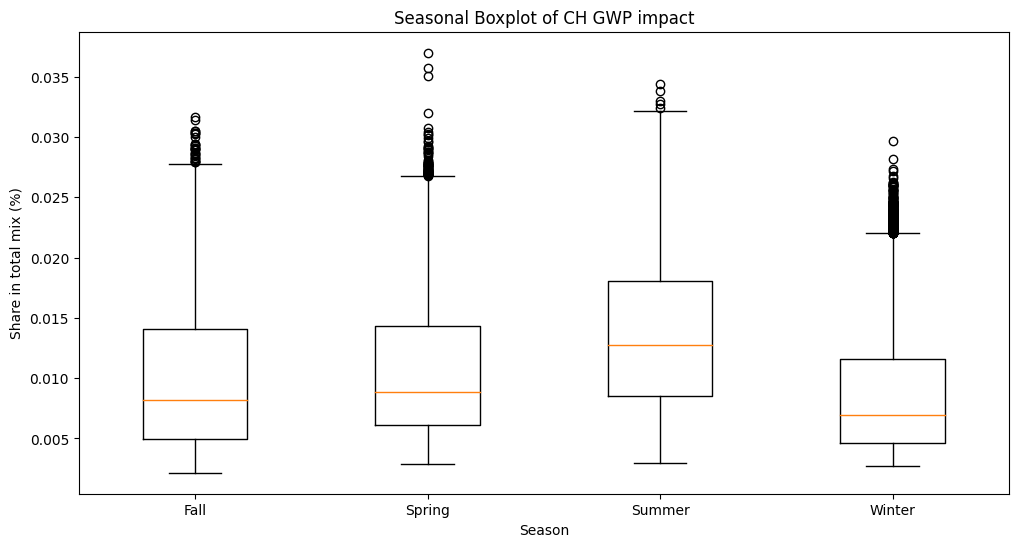

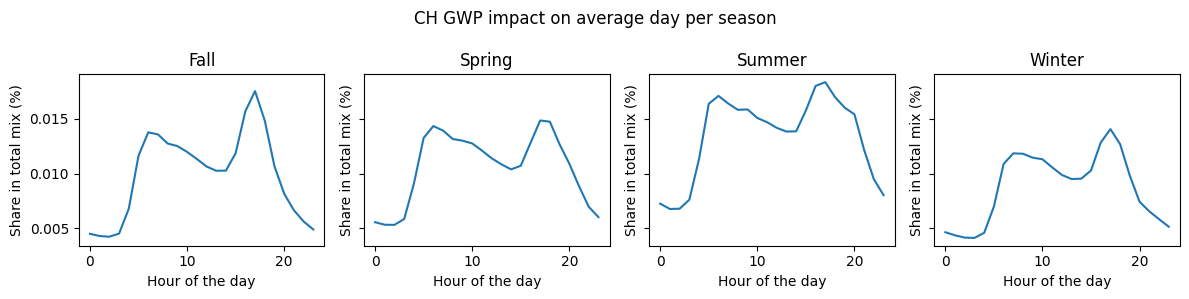

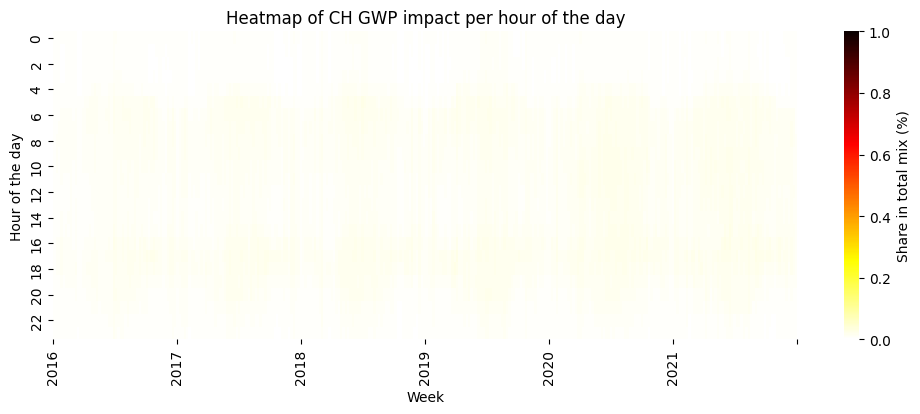

In [31]:
seasonal_data, grouped_data, season_names = analyze_series(gwps['CH'], daily_gwp['CH'], monthly_gwp['CH'],
                                                           'CH GWP impact')

FR :

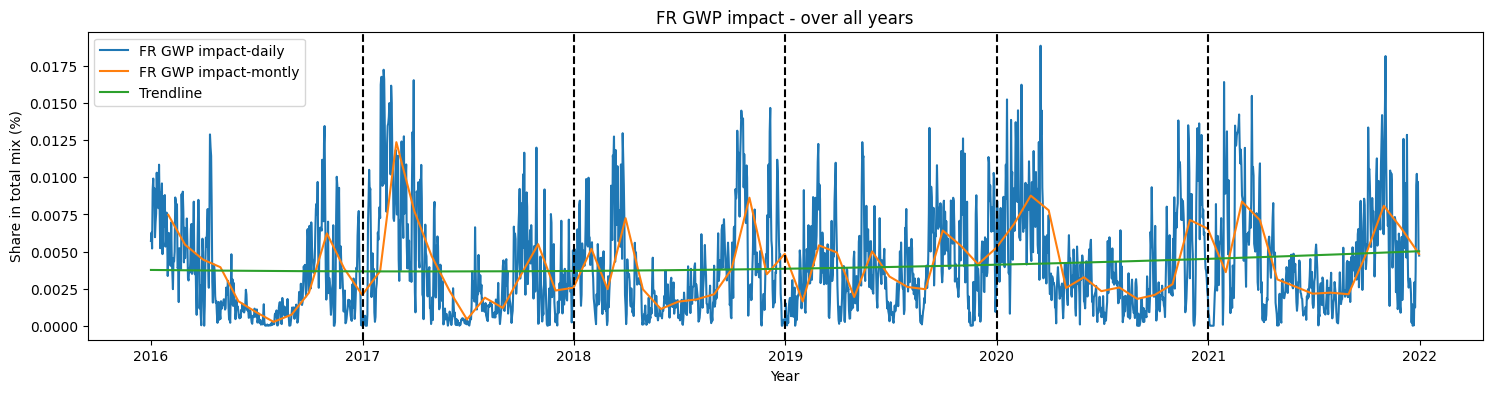

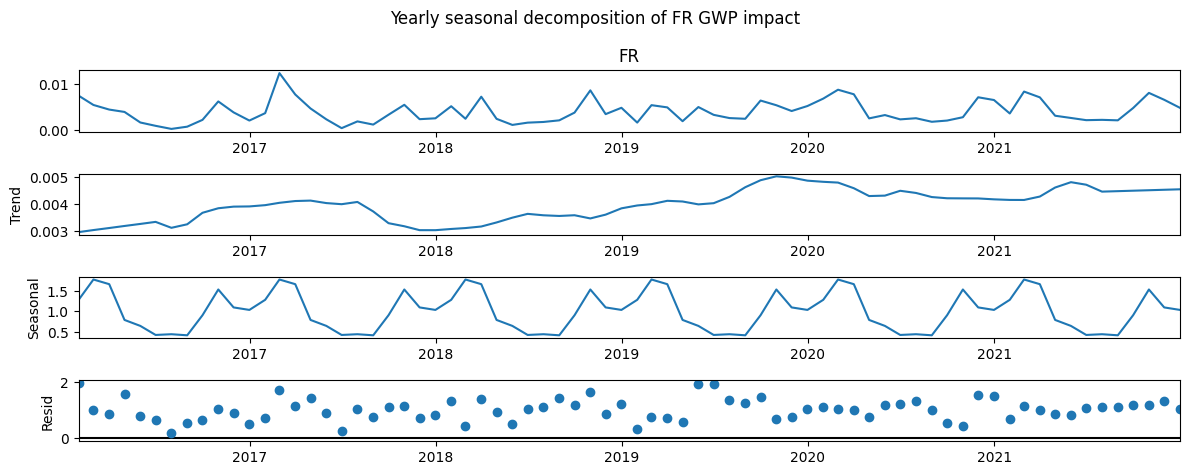

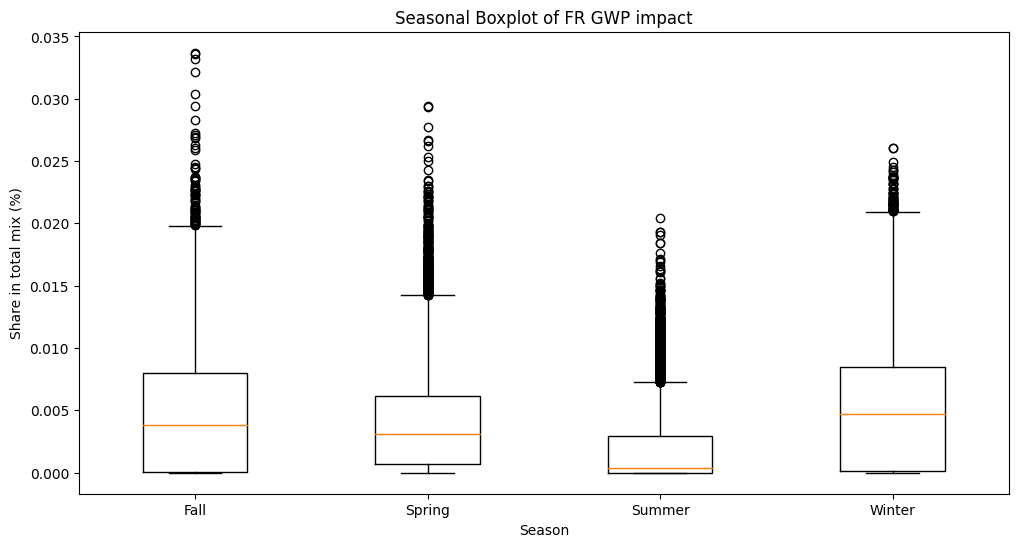

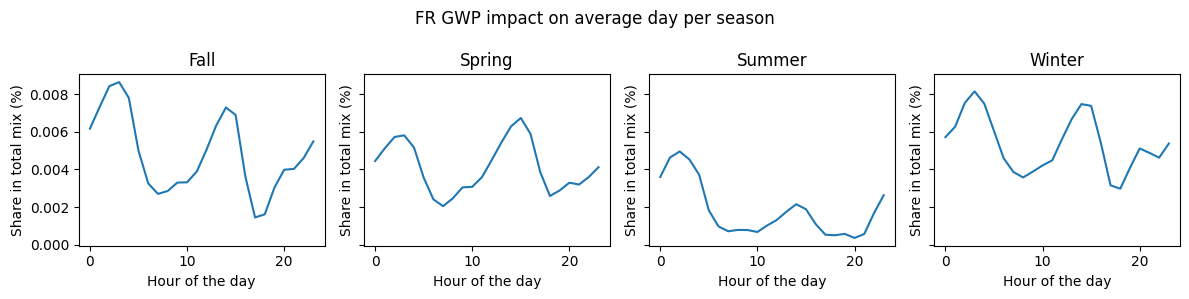

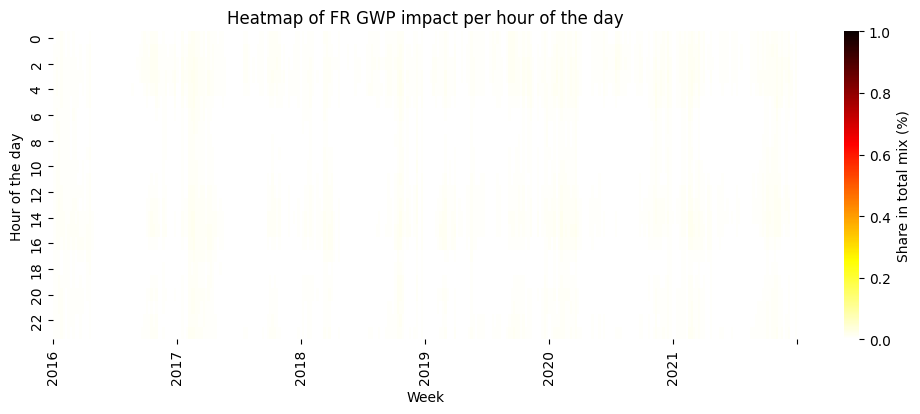

In [32]:
seasonal_data, grouped_data, season_names = analyze_series(gwps['FR'], daily_gwp['FR'], monthly_gwp['FR'],
                                                           'FR GWP impact')

DE :

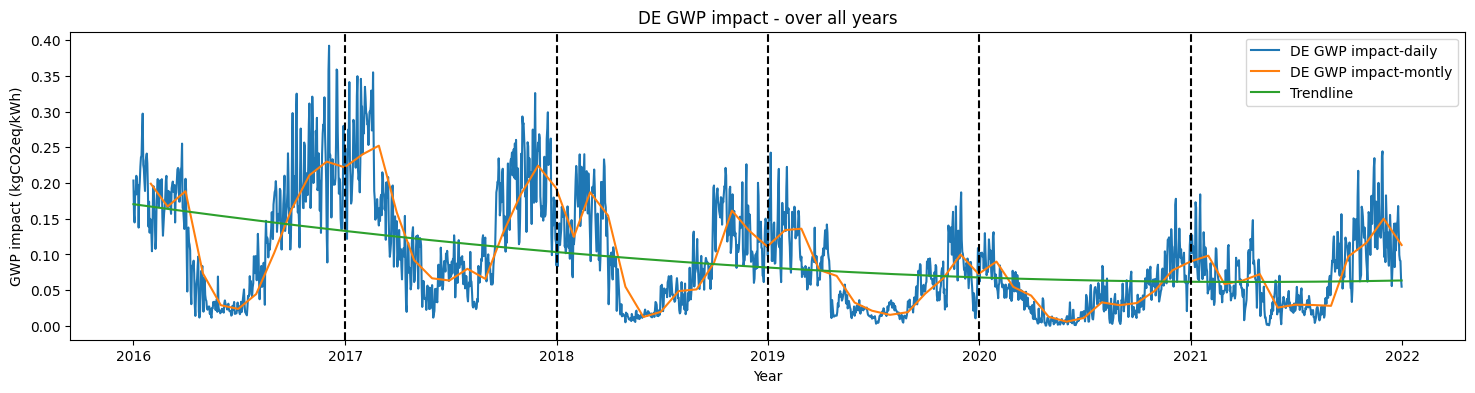

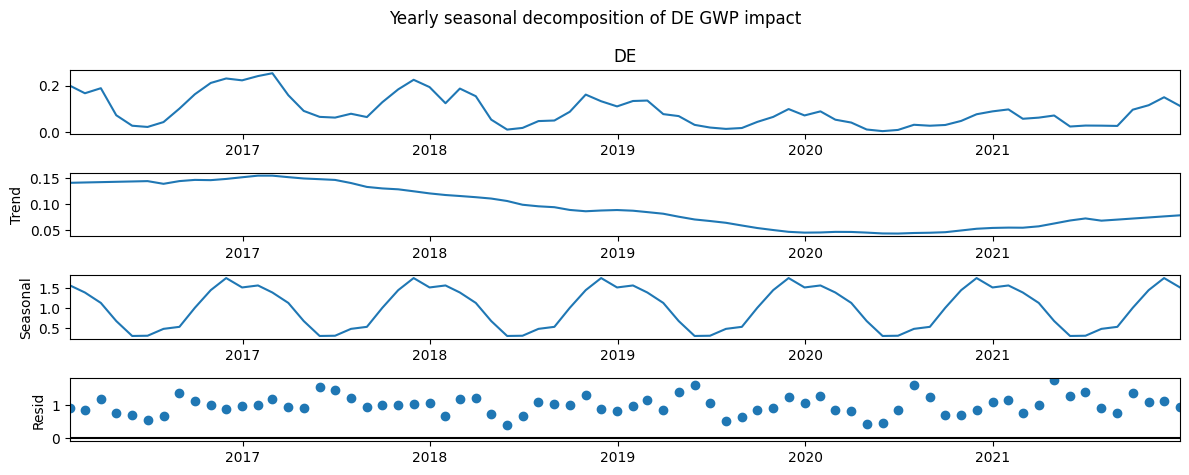

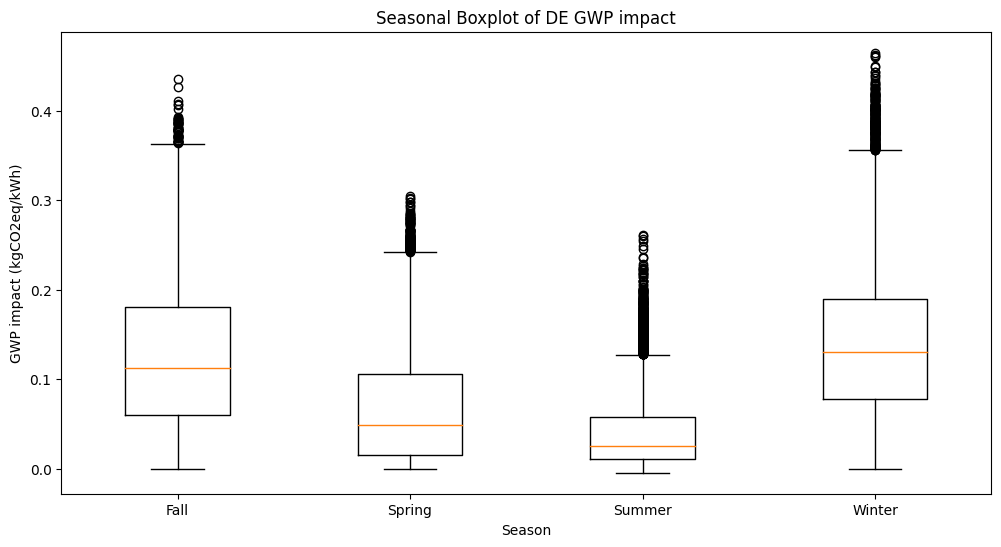

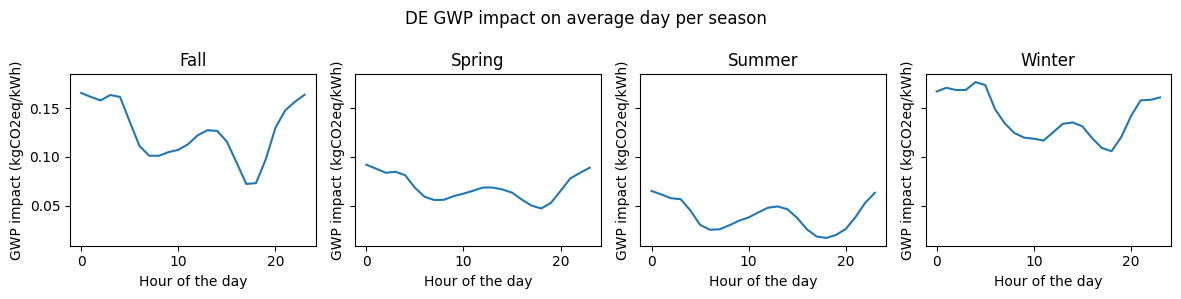

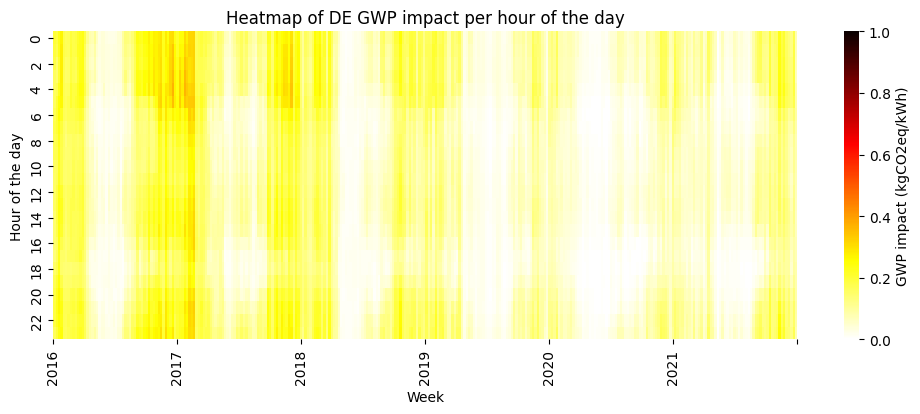

In [34]:
seasonal_data, grouped_data, season_names = analyze_series(gwps['DE'], daily_gwp['DE'], monthly_gwp['DE'],
                                                           'DE GWP impact', ylabel='GWP impact (kgCO2eq/kWh)')

============================

# OLD PART

### 2. Analysis of the data

#### 2.1 Compare mean, std, min, 50%, max of GWP impact evolution each year, for each country

We see that the German electrical mix is the most important factor of the GWP impact in Switzerland.
We also see that the GWP impact is decreasing over time.

#### 2.2 Total GWP impact evolution over time :

Let's plot the total GWP impact evolution over time :

In [ ]:
from etude_stat.analysis_functions import plot_trend, plot_years

fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(gwps.index, gwps['sum'], label='Hourly total GWP Impact')
ax.plot(monthly_gwp.index, monthly_gwp['sum'], label='Monthly total GWP Impact')
plot_trend(ax, gwps, gwps['sum'], 2, label='Trendline - sum')
plot_trend(ax, gwps, gwps['DE'], 2, label='Trendline - DE')
plot_years()
ax.set_title('Total GWP impact')
plt.show()

- The decreasing trend is confirmed
- We can see a seasonal pattern, with a higher GWP impact in winter and a lower one in summer, but the intensity of this pattern decreases over the years
-

This yearly seasonal pattern is confirmed by the decomposition of the GWP impact :

In [ ]:
decompose_result_mult = seasonal_decompose(daily_gwp['sum'], model="multiplicative", period=7 * 4 * 12,
                                           extrapolate_trend='freq')
fig = decompose_result_mult.plot()
fig.set_figwidth(12)

##### Box plot :

In [ ]:
data = daily_gwp
grouped_data = data.groupby('Season')
seasonal_data = [grouped_data.get_group(season)['sum'] for season in grouped_data.groups]
fig, ax = plt.subplots(figsize=(12, 6))
ax.boxplot(seasonal_data)
ax.set_xticklabels(grouped_data.groups.keys())
ax.set_xlabel('Season')
ax.set_ylabel('Total GWP impact')
ax.set_title('Seasonal Boxplot of Total GWP Impact')
plt.show()

##### Correlation between GWP impact and electricity consumption :



(we can also search periods at lower scales (hours, days, weeks) to see if there is a pattern)

#### 2.2 GWP impact of the Hydro Pumped Storage in Switzerland

Now let's plot the GWP impact of the Hydro Pumped Storage in Switzerland over time :

In [ ]:
fig, ax = plt.subplots(figsize=(18, 4))
ax.plot(gwps.index, gwps['Hydro_Pumped_Storage_CH'], label='Hydro Pumped Storage GWP Impact')
plot_trend(ax, gwps, gwps['Hydro_Pumped_Storage_CH'], 1)
plot_years()
ax.set_title('CH Hydro Pumped Storage GWP impact')
plt.show()

- The trend is very stable and increasing very slowly over the years
- There is a similar seasonal pattern as the total GWP impact, let's decompose it :

In [ ]:
decompose_result_mult = seasonal_decompose(daily_gwp['Hydro_Pumped_Storage_CH'], model="multiplicative",
                                           period=7 * 4 * 12, extrapolate_trend='freq')
fig = decompose_result_mult.plot()
fig.set_figwidth(12)

We can do it on only two years to see the seasonal pattern more clearly :

In [ ]:
daily_gwp[0:720]['Hydro_Pumped_Storage_CH'].plot()

In [ ]:
decompose_result_mult = seasonal_decompose(daily_gwp[0:720]['Hydro_Pumped_Storage_CH'], model="additive",
                                           period=4 * 7 * 12, extrapolate_trend='freq')
fig = decompose_result_mult.plot()
fig.set_figwidth(12)

There is more emissions in June-July and less in winter, meaning that the pumping storage is used more in summer and less in winter. (maybe because we use other types of hydro electricity sources ?)

#### 2.3 GWP impact of the imported electricity to Switzerland

Let's plot the GWP impact of the imported electricity to Switzerland over time :

In [ ]:
imported = gwps.drop(['sum', 'Hydro_Pumped_Storage_CH'], axis=1)
imported['sum'] = imported.sum(axis=1)
imported = imported.drop(['Other'], axis=1)
imported_monthly = imported.resample('M').mean()
fig, ax = plt.subplots(figsize=(18, 4))
imported.plot(ax=ax, legend='reverse', color=['m', 'k', 'y', 'b', 'c', 'g', 'tab:orange'])
imported_monthly['sum'].plot(ax=ax, color='r', label='sum-Monthly', legend=True)
plot_years()
ax.set_title('GWP per country')
plt.show()

We can see that Germany is the most important factor of the GWP impact of the imported electricity in Switzerland. This should however be compared to the mix of the imported electricity :

Germany is the most important source of imported electricity, so it explains its higher impact on the GWP of the Swiss electricity mix.
We can plot the ratio between the GWP impact of the imported electricity and the amount of the imported electricity :

In [ ]:
ratio = imported / df
ratio.plot(figsize=(18, 4), title="GWP impact/imported electricity");

On this graph, we can see that one MWh imported from Czech Republic has a higher GWP impact than one MWh imported from Germany. But Germany still have a high impact per MWh, and much more electricity is imported from this country.

For these reasons, to study the seasonal pattern of the imported electricity, we focus on Germany. We study the seasonal pattern over the five years of the study, from 2016 to 2021 :

In [ ]:
decompose_result_mult = seasonal_decompose(daily_gwp['FR'], model="additive", period=4 * 7 * 12,
                                           extrapolate_trend='freq')
fig = decompose_result_mult.plot()
fig.set_figwidth(12)
fig.suptitle('Seasonal decomposition of the GWP impact of the imported electricity from Germany')

In [ ]:
daily_df = df.resample('D').mean()
decompose_result_mult = seasonal_decompose(daily_df['DE'], model="additive", period=7 * 4 * 12,
                                           extrapolate_trend='freq')
fig = decompose_result_mult.plot()
fig.set_figwidth(12)
fig.suptitle('Seasonal decomposition of the imported electricity from Germany')

We can see that the emissions and the imported amount of electricity follow the same trend, i.e. the carbon emissions per imported MHh don't change a lot over the time.
The emissions are much higher in winter than in summer, and the trend is decreasing from 2016 to mi-2020, then increasing again.

We can plot over only two years to confirm these seasonal results :

In [ ]:
decompose_result_mult = seasonal_decompose(daily_gwp[0:720]['DE'], model="additive", period=4 * 7 * 12,
                                           extrapolate_trend='freq')
fig = decompose_result_mult.plot()
fig.set_figwidth(12)

In [13]:
from ecodynelec.preprocessing.loading import import_data
from ecodynelec.tracking import reorder_info
from ecodynelec.preprocessing.auxiliary import load_rawEntso
import pandas as pd
import ecodynelec.preprocessing.auxiliary as aux

ctry = my_config.ctry
my_config.start = '2021-01-01 00:00'
my_config.end = '2021-12-31 23:59'
my_config.freq = 'H'

p = my_config
neighbours = aux.load_useful_countries(path_neighbour=p.path.neighbours, ctry=p.ctry)
raw_prodExch = import_data(ctry=p.ctry, start=p.start, end=p.end, freq=p.freq, involved_countries=neighbours, prod_gap=None, sg_data=None,
                           path_gen=p.path.generation, path_imp=p.path.exchanges,
                           savedir=p.path.savedir, net_exchange=p.net_exchanges,
                           residual_global=p.residual_global, correct_imp=p.sg_imports,
                           clean_data=p.data_cleaning, is_verbose=True)

df = load_rawEntso(mix_data=raw_prodExch, freq=my_config.freq)
ctry, ctry_mix, prod_means, all_sources = reorder_info(data=df)

power = {}
energys = {}
for t in range(df.shape[0]):
    energy = pd.DataFrame(data=df.iloc[t].values.reshape(( len(ctry) , len(prod_means) )),
                           columns=prod_means, index=ctry, dtype='float32')
    energys[t] = pd.DataFrame(df.iloc[t].values, index=all_sources)#energy
    power[t] = energy.sum(axis=1)

Load generation data...
	Generation data.
Data loading: 13.58 sec.
Memory usage table: 196.13 MB
Autocomplete...               6/6)...
	Completed.                              
Extraction raw generation: 7.23 sec.             
	Extraction time: 21.19 sec.
	4/4 - Resample exchanges to H steps...
Get and reduce importation data...
	Cross-border flow data.
Data loading: 5.96 sec..
Memory usage table: 79.02 MB
Autocomplete...               ...
	Completed.                              
Extraction raw import: 1.62 sec.             
	Extraction time: 7.70 sec.
Resample exchanges to H steps...
Gather generation and importation...
Import of data: 29.1 sec


ValueError: Shape of passed values is (162, 1), indices imply (127, 1)

In [15]:
df.iloc[t]

Biomass_AT                       180.000000
Fossil_Brown_coal/Lignite_AT       0.000000
Fossil_Coal-derived_gas_AT         0.000000
Fossil_Gas_AT                   1665.699951
Fossil_Hard_coal_AT                0.000000
                                   ...     
Mix_CZ_IT                          0.000000
Mix_DE_IT                          0.000000
Mix_FR_IT                        491.000000
Mix_IT_IT                          0.000000
Mix_Other_IT                     316.479980
Name: 2021-01-01 00:00:00, Length: 162, dtype: float32

In [ ]:
energys[0]

In [10]:
energys = pd.DataFrame.from_dict(energys, orient="index").T
energys

ValueError: Must pass 2-d input. shape=(52608, 6, 27)

In [5]:
energys[0]

Biomass  Fossil_Brown_coal/Lignite  Fossil_Coal-derived_gas   
AT   307.000000                   0.000000                 0.000000  \
CH     0.000000                   0.000000                 0.000000   
CZ   271.220001                3114.199951               225.539993   
DE  4584.389648               14792.637695               373.450012   
FR   253.000000                   0.000000                 0.000000   
IT   216.000000                   0.000000               241.000000   

     Fossil_Gas  Fossil_Hard_coal  Fossil_Oil  Fossil_Oil_shale  Fossil_Peat   
AT   728.099976        152.300003    0.000000               0.0          0.0  \
CH     0.000000          0.000000    0.000000               0.0          0.0   
CZ   184.949997        517.080017   13.100000               0.0          0.0   
DE  1934.717529       4127.602539  199.089996               0.0          0.0   
FR  2232.000000        399.000000  260.000000               0.0          0.0   
IT  5034.000000       1719.000000  519.000000               0.0          0.0   

    Geothermal  Hydro_Pumped_Storage  ...       Waste  Wind_Offshore   
AT        0.07              0.000000  ...  100.000000       0.000000  \
CH        0.00            253.500000  ...    0.000000       0.000000   
CZ        0.00              0.000000  ...   18.330000       0.000000   
DE       16.26            288.147491  ...  647.275024    2292.850098   
FR        0.00            439.000000  ...   92.000000       0.000000   
IT      706.00              0.000000  ...   46.000000       0.000000   

    Wind_Onshore      Mix_AT       Mix_CH       Mix_CZ       Mix_DE    Mix_FR   
AT    152.220001    0.000000     0.000000  2069.537598  2939.912598     0.000  \
CH      4.740000  740.803772     0.000000     0.000000  3660.741211   381.375   
CZ     40.669998    0.000000     0.000000     0.000000   842.869995     0.000   
DE   6253.799805    0.000000   565.540039   569.150024     0.000000   558.250   
FR   1753.000000    0.000000     0.000000     0.000000     0.000000     0.000   
IT    218.000000    0.000000  1888.000000     0.000000     0.000000  1144.000   

    Mix_IT    Mix_Other  
AT   48.25     8.455000  
CH    0.00     0.000000  
CZ    0.00  1132.000000  
DE    0.00   701.178772  
FR    0.00   962.000000  
IT    0.00   368.600006  

[6 rows x 27 columns]

In [78]:
power = pd.DataFrame(power).T
power.index = df.index

In [59]:
power['CH']

2017-02-01 00:00:00     9607.009766
2017-02-01 01:00:00     9865.939453
2017-02-01 02:00:00     9987.580078
2017-02-01 03:00:00     9982.389648
2017-02-01 04:00:00    10125.410156
2017-02-01 05:00:00     9691.839844
2017-02-01 06:00:00     9718.419922
2017-02-01 07:00:00    10100.679688
2017-02-01 08:00:00     9654.780273
2017-02-01 09:00:00     9551.640625
2017-02-01 10:00:00     9646.160156
2017-02-01 11:00:00     8731.320312
2017-02-01 12:00:00     8609.719727
2017-02-01 13:00:00     9139.759766
2017-02-01 14:00:00     9221.429688
2017-02-01 15:00:00     9520.709961
2017-02-01 16:00:00     9704.990234
2017-02-01 17:00:00     9833.089844
2017-02-01 18:00:00     9121.060547
2017-02-01 19:00:00     8752.940430
2017-02-01 20:00:00     8616.730469
2017-02-01 21:00:00     8940.889648
2017-02-01 22:00:00     8882.120117
2017-02-01 23:00:00     9361.250000
Freq: H, Name: CH, dtype: float32

In [73]:
mix_ch_1

CH        DE        FR        AT            IT        CZ   
2016-01-01  0.499961  0.311013  0.138297  0.024198  2.331339e-04  0.014901  \
2016-01-02  0.492782  0.316550  0.153333  0.022853  2.428967e-04  0.009535   
2016-01-03  0.511133  0.302679  0.141652  0.027528  2.188526e-04  0.010702   
2016-01-04  0.493788  0.281626  0.167270  0.042491  7.950871e-05  0.009523   
2016-01-05  0.543703  0.256152  0.168799  0.018947  1.116423e-04  0.006178   
...              ...       ...       ...       ...           ...       ...   
2021-12-27  0.538257  0.205106  0.203941  0.027556  4.452637e-07  0.011865   
2021-12-28  0.514897  0.205958  0.244090  0.018443  3.812894e-06  0.006004   
2021-12-29  0.569172  0.180144  0.218644  0.020411  4.948253e-06  0.006463   
2021-12-30  0.553615  0.264046  0.124511  0.037013  4.389677e-06  0.010099   
2021-12-31  0.550546  0.269495  0.106029  0.053323  0.000000e+00  0.012015   

               Other  
2016-01-01  0.011397  
2016-01-02  0.004705  
2016-01-03  0.006086  
2016-01-04  0.005223  
2016-01-05  0.006110  
...              ...  
2021-12-27  0.013274  
2021-12-28  0.010603  
2021-12-29  0.005161  
2021-12-30  0.010713  
2021-12-31  0.008592  

[2192 rows x 7 columns]

In [79]:
mix_ch_1 = daily_productions.drop('sum', axis=1)[['CH', 'DE', 'FR', 'AT', 'IT', 'CZ', 'Other']]
power_daily_ch = power['CH'].resample('D').mean()
mix_ch_1 = mix_ch_1 * power_daily_ch.to_numpy().reshape((len(power_daily_ch), 1))

<Axes: >

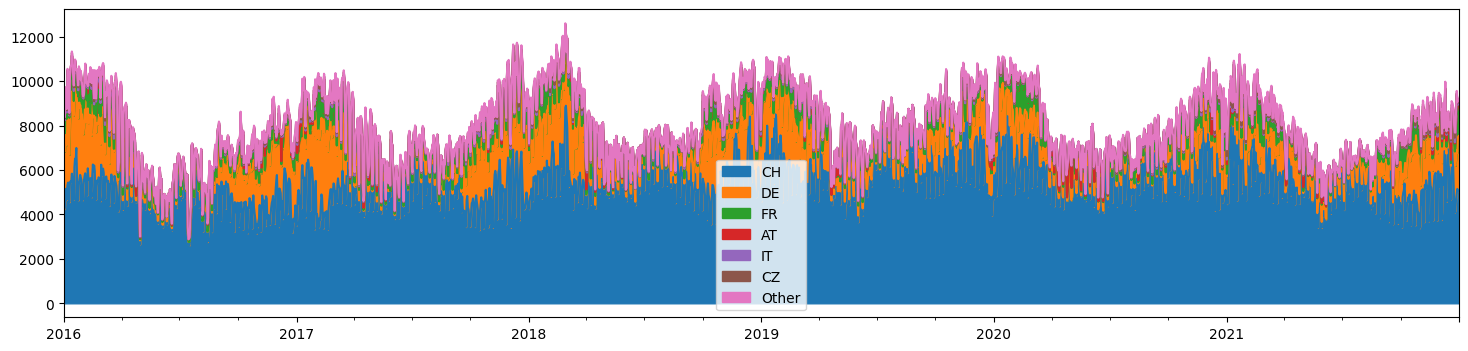

In [81]:
mix_ch_1.plot.area(figsize=(18, 4))

<Axes: >

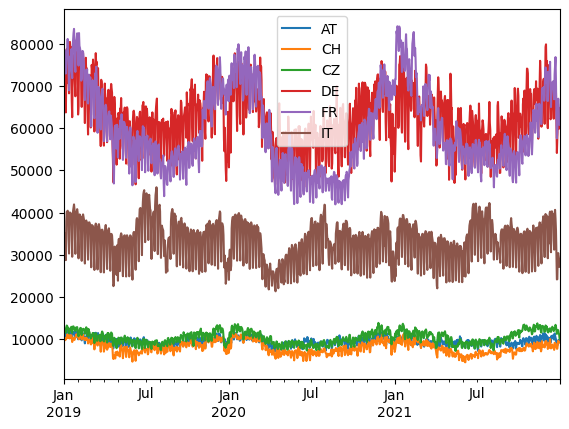

In [67]:
power.resample('D').mean().plot()

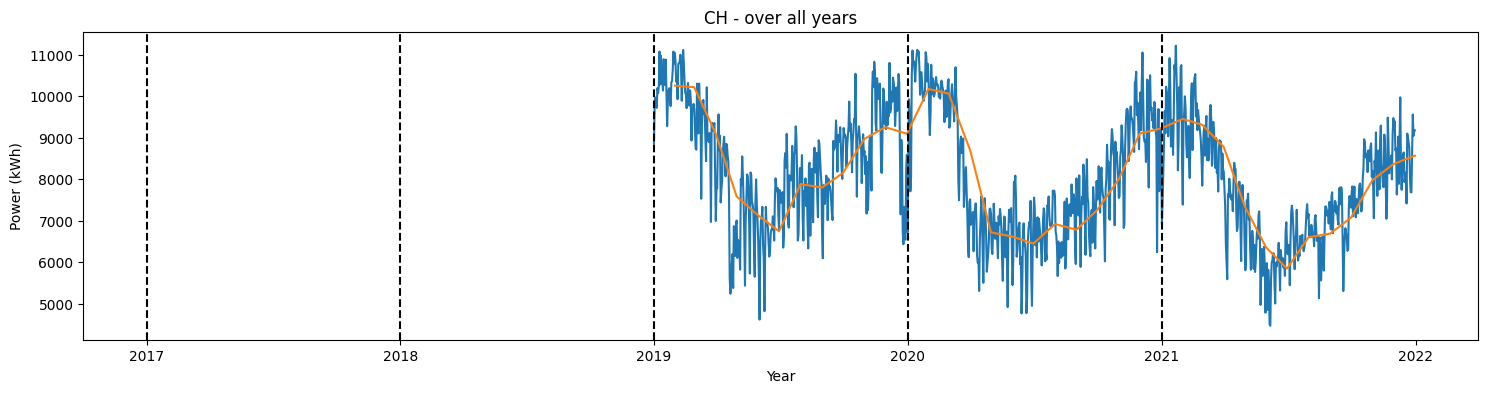

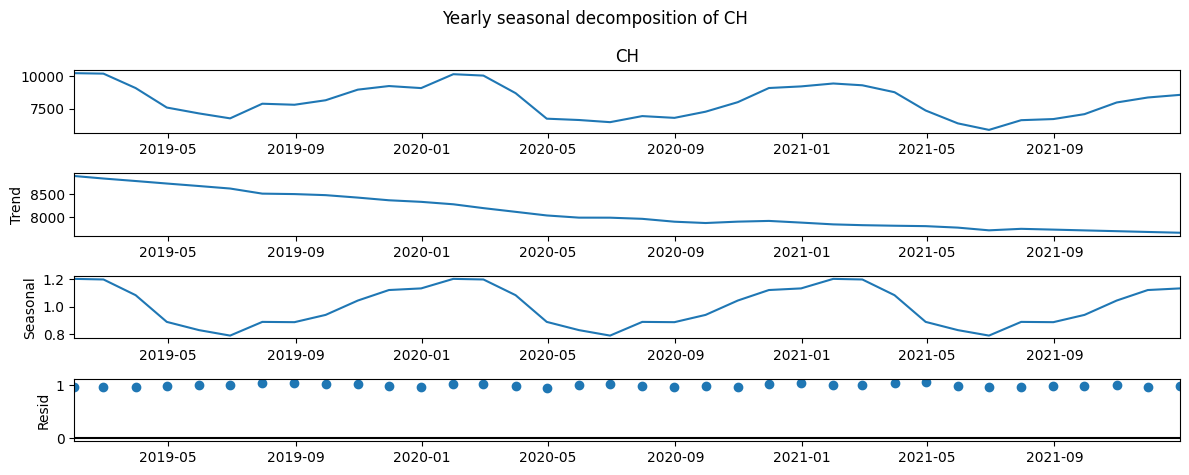

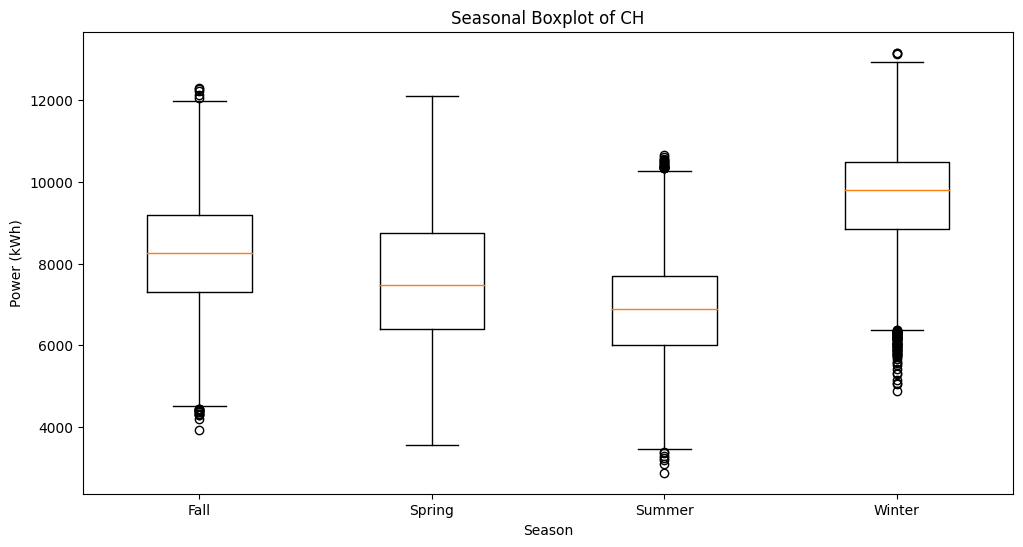

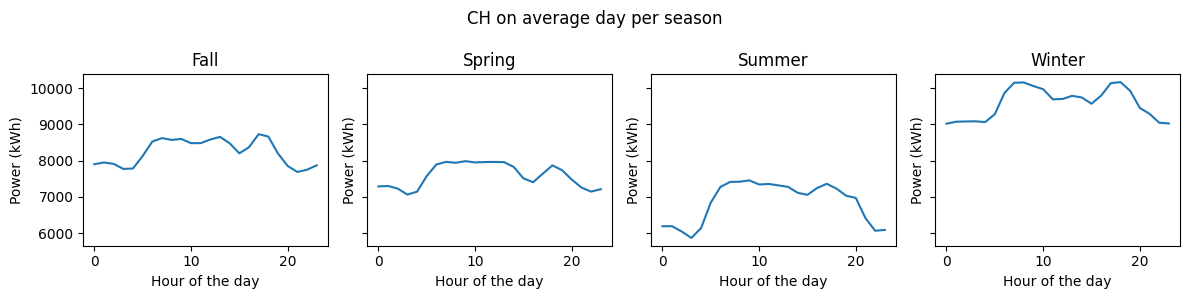

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (4).

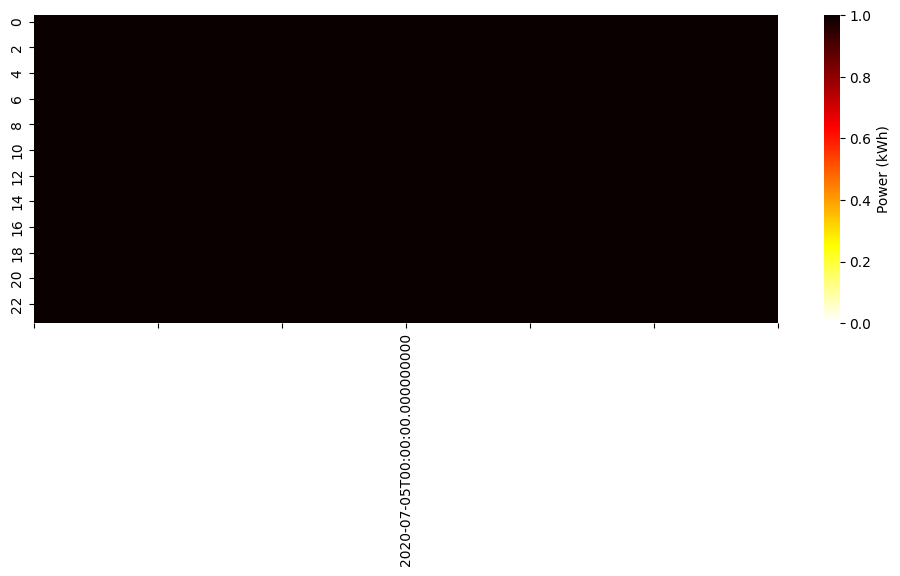

In [63]:
analyze_series(power['CH'], power['CH'].resample('D').mean(), power['CH'].resample('M').mean(), 'CH', ylabel='Power (kWh)')